In [1]:
print("hello")

hello


In [2]:
import os
from pathlib import Path

# === adjust paths for your local machine ===
PROJECT_ROOT = Path("/home/muhammad-noman/projects/plant_disease-gpu-env")
DATASET_PATH = PROJECT_ROOT / "data" / "raw"      # <-- raw/img1..img9 live here

# gather top-level folders (img1, img2, ...)
main_folders = sorted([d.name for d in DATASET_PATH.iterdir() if d.is_dir()])

print("\n🔍 EXPLORING DISEASE CLASSES:\n")
print("=" * 70)

all_disease_classes = {}

for main_folder in main_folders:
    main_folder_path = DATASET_PATH / main_folder

    print(f"\n📂 {main_folder}:")
    print("-" * 70)

    disease_classes = []
    # list only subdirectories (class folders)
    for item in sorted(os.listdir(main_folder_path)):
        item_path = main_folder_path / item
        if item_path.is_dir():
            disease_classes.append(item)
            print(f"   └─ {item}")

    all_disease_classes[main_folder] = disease_classes
    print(f"\n   ✓ Total classes in {main_folder}: {len(disease_classes)}")

print("\n" + "=" * 70)
print(f"✅ Found {len(main_folders)} main folders")
print("📋 Folders:", main_folders)



🔍 EXPLORING DISEASE CLASSES:


📂 img1:
----------------------------------------------------------------------
   └─ Apple___Apple_scab
   └─ Apple___Black_rot
   └─ Apple___Cedar_apple_rust
   └─ Apple___healthy

   ✓ Total classes in img1: 4

📂 img2:
----------------------------------------------------------------------
   └─ Blueberry___healthy
   └─ Cherry_(including_sour)___Powdery_mildew
   └─ Cherry_(including_sour)___healthy

   ✓ Total classes in img2: 3

📂 img3:
----------------------------------------------------------------------
   └─ Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
   └─ Corn_(maize)___Common_rust_
   └─ Corn_(maize)___Northern_Leaf_Blight
   └─ Corn_(maize)___healthy

   ✓ Total classes in img3: 4

📂 img4:
----------------------------------------------------------------------
   └─ Grape___Black_rot
   └─ Grape___Esca_(Black_Measles)
   └─ Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
   └─ Grape___healthy

   ✓ Total classes in img4: 4

📂 img6:
---------

In [3]:
# Count images in each disease class
import glob

print("\n📊 IMAGE COUNT PER CLASS:\n")
print("=" * 70)

class_image_counts = {}
total_images = 0

for main_folder in sorted(main_folders):
    print(f"\n📂 {main_folder}:")
    print("-" * 70)

    main_folder_path = os.path.join(DATASET_PATH, main_folder)

    for disease_class in sorted(all_disease_classes[main_folder]):
        class_path = os.path.join(main_folder_path, disease_class)

        # Count all image files (jpg, jpeg, png)
        image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.JPG', '*.JPEG', '*.PNG']
        image_files = []

        for ext in image_extensions:
            image_files.extend(glob.glob(os.path.join(class_path, ext)))

        num_images = len(image_files)
        total_images += num_images

        # Store count
        full_class_name = f"{main_folder}__{disease_class}"
        class_image_counts[full_class_name] = num_images

        # Print with formatting
        print(f"   └─ {disease_class:<50} : {num_images:>5} images")

print("\n" + "=" * 70)
print(f"\n✅ Total images counted: {total_images}")


📊 IMAGE COUNT PER CLASS:


📂 img1:
----------------------------------------------------------------------
   └─ Apple___Apple_scab                                 :   630 images
   └─ Apple___Black_rot                                  :   621 images
   └─ Apple___Cedar_apple_rust                           :   275 images
   └─ Apple___healthy                                    :  1645 images

📂 img2:
----------------------------------------------------------------------
   └─ Blueberry___healthy                                :  1502 images
   └─ Cherry_(including_sour)___Powdery_mildew           :  1052 images
   └─ Cherry_(including_sour)___healthy                  :   854 images

📂 img3:
----------------------------------------------------------------------
   └─ Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot :   513 images
   └─ Corn_(maize)___Common_rust_                        :  1192 images
   └─ Corn_(maize)___Northern_Leaf_Blight                :   985 images
   └─ Corn_(m

In [4]:
# Create a comprehensive summary
print("\n" + "🎯 COMPLETE DATASET SUMMARY ".center(70, "="))
print()

# Total statistics
unique_classes = set()
for classes in all_disease_classes.values():
    unique_classes.update(classes)

print(f"📊 STATISTICS:")
print(f"   • Main Folders: {len(main_folders)}")
print(f"   • Unique Disease Classes: {len(unique_classes)}")
print(f"   • Total Images: {total_images}")
print(f"   • Average Images per Class: {total_images / len(class_image_counts):.0f}")

# Find min and max
min_images = min(class_image_counts.values())
max_images = max(class_image_counts.values())
min_class = [k for k, v in class_image_counts.items() if v == min_images][0]
max_class = [k for k, v in class_image_counts.items() if v == max_images][0]

print(f"\n📈 RANGE:")
print(f"   • Smallest class: {min_class} ({min_images} images)")
print(f"   • Largest class: {max_class} ({max_images} images)")

# List all unique classes
print(f"\n📋 ALL UNIQUE CLASSES ({len(unique_classes)}):")
for i, cls in enumerate(sorted(unique_classes), 1):
    print(f"   {i:>2}. {cls}")

print("\n" + "=" * 70)


=====================🎯 COMPLETE DATASET SUMMARY ======================

📊 STATISTICS:
   • Main Folders: 6
   • Unique Disease Classes: 23
   • Total Images: 24432
   • Average Images per Class: 1062

📈 RANGE:
   • Smallest class: img6__Potato___healthy (152 images)
   • Largest class: img9__Tomato___Late_blight (1909 images)

📋 ALL UNIQUE CLASSES (23):
    1. Apple___Apple_scab
    2. Apple___Black_rot
    3. Apple___Cedar_apple_rust
    4. Apple___healthy
    5. Blueberry___healthy
    6. Cherry_(including_sour)___Powdery_mildew
    7. Cherry_(including_sour)___healthy
    8. Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
    9. Corn_(maize)___Common_rust_
   10. Corn_(maize)___Northern_Leaf_Blight
   11. Corn_(maize)___healthy
   12. Grape___Black_rot
   13. Grape___Esca_(Black_Measles)
   14. Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
   15. Grape___healthy
   16. Pepper,_bell___healthy
   17. Potato___Early_blight
   18. Potato___Late_blight
   19. Potato___healthy
   20. Tom

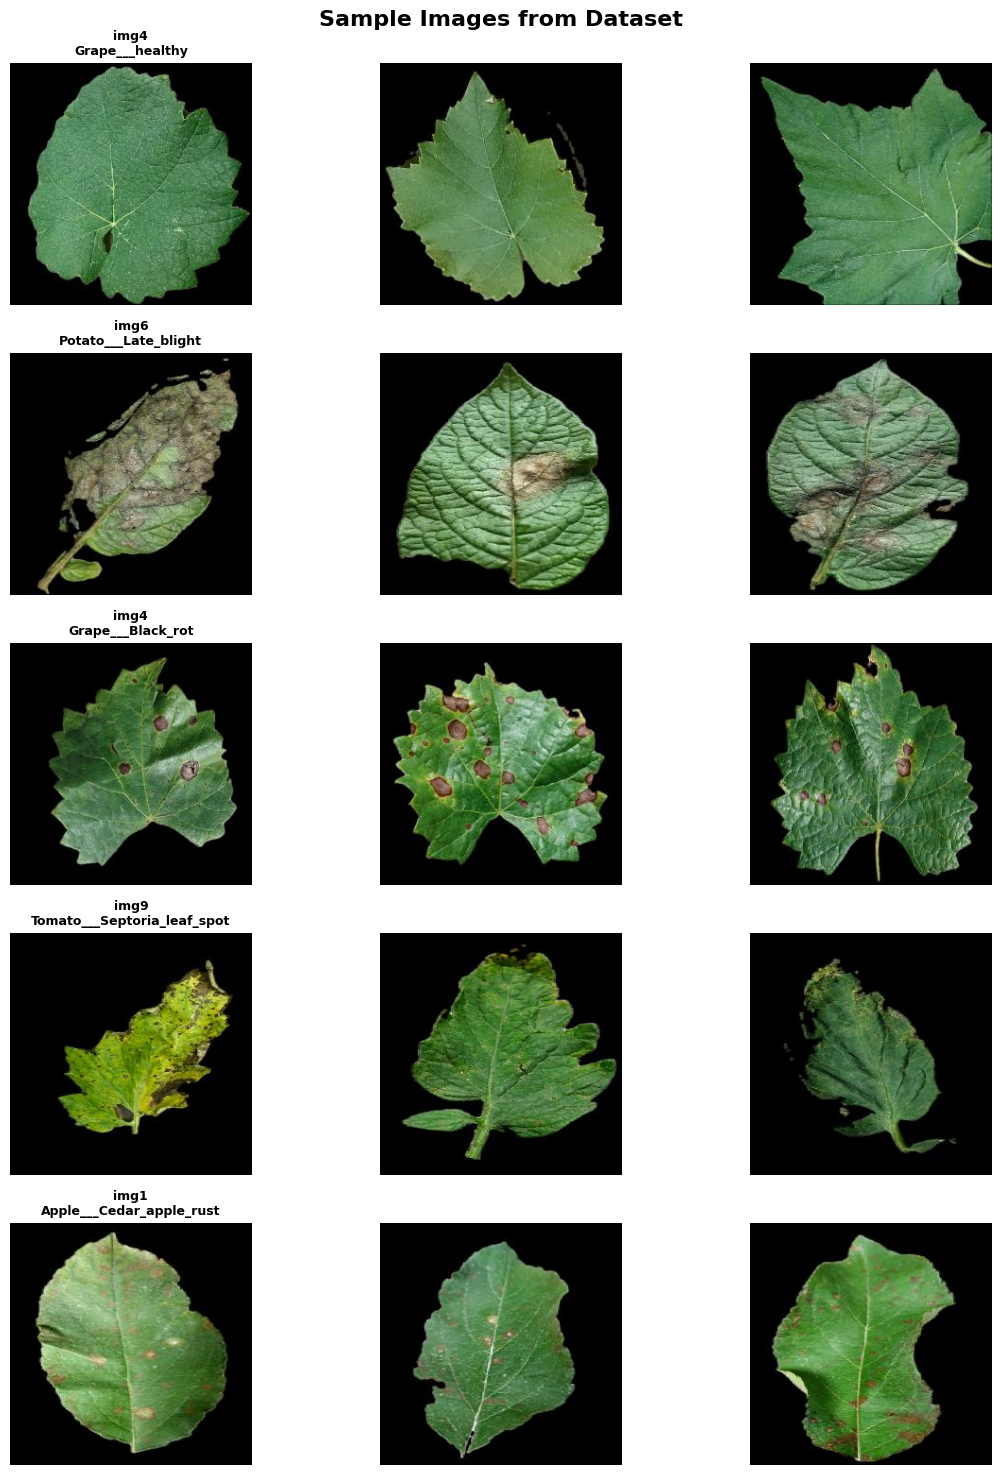

✅ Sample images saved as: /home/muhammad-noman/projects/plant_disease-gpu-env/outputs/sample_images.png


In [6]:
# SAMPLE GRID FROM LOCAL RAW DATA (img1..img9)
import os, glob, random
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt  # <= if "plt not defined", this import fixes it

# ---- CONFIG (local) ----
PROJECT_ROOT = Path("/home/muhammad-noman/projects/plant_disease-gpu-env")
DATASET_PATH = PROJECT_ROOT / "data" / "raw"   # img1..img9 live here
SAVE_PATH = PROJECT_ROOT / "outputs" / "sample_images.png"
SAVE_PATH.parent.mkdir(parents=True, exist_ok=True)

# Build the {imgX: [classes...]} dict if not already built
all_disease_classes = {}
main_folders = sorted([d.name for d in DATASET_PATH.iterdir() if d.is_dir()])
for main_folder in main_folders:
    class_dirs = sorted(
        [d.name for d in (DATASET_PATH / main_folder).iterdir() if d.is_dir()]
    )
    all_disease_classes[main_folder] = class_dirs

def show_sample_images(dataset_path: Path, all_disease_classes: dict, num_samples: int = 3):
    """Show sample images from random classes and save a grid."""
    # collect all (imgX, class_name) tuples
    all_pairs = [(f, cls) for f, classes in all_disease_classes.items() for cls in classes]
    if not all_pairs:
        raise RuntimeError("No classes found under data/raw/img*/<class>/")

    # pick up to 5 random classes
    k = min(5, len(all_pairs))
    random_classes = random.sample(all_pairs, k)

    # make a subplot grid of k rows x num_samples cols
    fig, axes = plt.subplots(k, num_samples, figsize=(12, 3*k), squeeze=False)
    fig.suptitle("Sample Images from Dataset", fontsize=16, fontweight="bold")

    for row_idx, (folder, disease_class) in enumerate(random_classes):
        class_path = dataset_path / folder / disease_class

        # collect images for this class
        image_files = []
        for ext in ("*.jpg", "*.jpeg", "*.png", "*.JPG", "*.JPEG", "*.PNG"):
            image_files.extend(glob.glob(str(class_path / ext)))

        if not image_files:
            # no images: leave row blank with a note
            for col in range(num_samples):
                axes[row_idx, col].axis("off")
            axes[row_idx, 0].set_title(f"{folder}\n{disease_class}\n(no images)", fontsize=9, fontweight="bold")
            continue

        # sample up to num_samples images
        picks = random.sample(image_files, min(num_samples, len(image_files)))

        for col, img_path in enumerate(picks):
            try:
                with Image.open(img_path) as img:
                    img = img.convert("RGB")
                    axes[row_idx, col].imshow(img)
            except Exception as e:
                axes[row_idx, col].text(0.5, 0.5, f"Error\n{Path(img_path).name}", ha="center", va="center")
            axes[row_idx, col].axis("off")

            if col == 0:
                axes[row_idx, col].set_title(f"{folder}\n{disease_class}", fontsize=9, fontweight="bold")

        # if class had fewer than num_samples, hide extra axes
        for col in range(len(picks), num_samples):
            axes[row_idx, col].axis("off")

    plt.tight_layout()
    plt.savefig(SAVE_PATH, dpi=150, bbox_inches="tight")
    plt.show()
    print(f"✅ Sample images saved as: {SAVE_PATH}")

# run it
show_sample_images(DATASET_PATH, all_disease_classes, num_samples=3)


In [7]:
# === ORGANIZE RAW DATA INTO A FLAT CLASS STRUCTURE ==========================
import os, glob, shutil, time
from pathlib import Path
from tqdm.auto import tqdm

# --- paths on your machine ---
PROJECT_ROOT = Path("/home/muhammad-noman/projects/plant_disease-gpu-env")
SOURCE_PATH  = PROJECT_ROOT / "data" / "raw"                 # contains img1, img2, ...
DEST_PATH    = PROJECT_ROOT / "data" / "organized_dataset"   # will be created/filled

print(f"Source: {SOURCE_PATH}")
print(f"Destination: {DEST_PATH}")

def organize_dataset(source_path: Path, dest_path: Path):
    """
    Organize scattered dataset into:
        dest_path/
            ├── Disease_Class_1/
            ├── Disease_Class_2/
            └── ...
    """
    t0 = time.time()
    print("\n🔄 Starting dataset organization...\n")

    # create destination root
    dest_path.mkdir(parents=True, exist_ok=True)

    # discover main folders (img1, img2, ...)
    main_folders = sorted([p for p in source_path.iterdir() if p.is_dir()])
    print("📂 Found main folders:", [p.name for p in main_folders], "\n")

    total_copied = 0
    copy_summary = {}

    # process each img* folder
    for main_folder in main_folders:
        print(f"Processing {main_folder.name}...")
        # disease class folders inside this img*
        disease_folders = sorted([p for p in main_folder.iterdir() if p.is_dir()])

        for disease_dir in tqdm(disease_folders, desc=f"  {main_folder.name}", leave=False):
            dest_class_dir = dest_path / disease_dir.name
            dest_class_dir.mkdir(parents=True, exist_ok=True)

            # init counter for this class
            copy_summary.setdefault(disease_dir.name, 0)

            # copy all images (case-insensitive ext match)
            exts = ("*.jpg","*.jpeg","*.png","*.JPG","*.JPEG","*.PNG")
            image_files = []
            for pat in exts:
                image_files.extend(disease_dir.glob(pat))

            for src in image_files:
                name, ext = os.path.splitext(src.name)
                dst = dest_class_dir / src.name

                # handle duplicate filenames
                counter = 1
                while dst.exists():
                    dst = dest_class_dir / f"{name}_{counter}{ext}"
                    counter += 1

                shutil.copy2(src, dst)
                total_copied += 1
                copy_summary[disease_dir.name] += 1

        print(f"  ✓ {main_folder.name} completed\n")

    # summary
    print("=" * 70)
    print("✅ ORGANIZATION COMPLETE!")
    print("=" * 70)
    print(f"\n📊 Summary:")
    print(f"   Total images copied: {total_copied}")
    print(f"   Total disease classes: {len(copy_summary)}")
    print(f"\n📋 Images per class:")
    for cls, cnt in sorted(copy_summary.items()):
        print(f"   └─ {cls:<50} : {cnt:>5} images")

    elapsed = time.time() - t0
    print(f"\n⏱️  Elapsed: {elapsed/60:.1f} min")
    return dest_path, copy_summary

# --- run (does NOT delete anything; it will append if folder already exists) ---
organized_path, summary = organize_dataset(SOURCE_PATH, DEST_PATH)


/home/muhammad-noman/projects/plant_disease-gpu-env/.plants-gpu/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Source: /home/muhammad-noman/projects/plant_disease-gpu-env/data/raw
Destination: /home/muhammad-noman/projects/plant_disease-gpu-env/data/organized_dataset

🔄 Starting dataset organization...

📂 Found main folders: ['img1', 'img2', 'img3', 'img4', 'img6', 'img9'] 

Processing img1...


  ✓ img1 completed

Processing img2...


  ✓ img2 completed

Processing img3...


  ✓ img3 completed

Processing img4...


  ✓ img4 completed

Processing img6...


  ✓ img6 completed

Processing img9...


  ✓ img9 completed

✅ ORGANIZATION COMPLETE!

📊 Summary:
   Total images copied: 24432
   Total disease classes: 23

📋 Images per class:
   └─ Apple___Apple_scab                                 :   630 images
   └─ Apple___Black_rot                                  :   621 images
   └─ Apple___Cedar_apple_rust                           :   275 images
   └─ Apple___healthy                                    :  1645 images
   └─ Blueberry___healthy                                :  1502 images
   └─ Cherry_(including_sour)___Powdery_mildew           :  1052 images
   └─ Cherry_(including_sour)___healthy                  :   854 images
   └─ Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot :   513 images
   └─ Corn_(maize)___Common_rust_                        :  1192 images
   └─ Corn_(maize)___Northern_Leaf_Blight                :   985 images
   └─ Corn_(maize)___healthy                             :  1162 images
   └─ Grape___Black_rot                                  :  1180 images

In [8]:
from pathlib import Path

ORG = Path("/home/muhammad-noman/projects/plant_disease-gpu-env/data/organized_dataset")

def count_images(p: Path):
    exts = {".jpg",".jpeg",".png",".bmp",".tif",".tiff",".webp",".JPG",".JPEG",".PNG"}
    return sum(1 for q in p.rglob("*") if q.suffix in exts)

classes = sorted([d.name for d in ORG.iterdir() if d.is_dir()])
print(f"Classes: {len(classes)}")
print("First 10:", classes[:10])
print("Total images:", count_images(ORG))


Classes: 23
First 10: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight']
Total images: 24432


In [10]:
# === VERIFY ORGANIZED STRUCTURE (local paths) ===============================
import os
from pathlib import Path

# point to your project + organized dataset
PROJECT_ROOT   = Path("/home/muhammad-noman/projects/plant_disease-gpu-env")
ORGANIZED_PATH = PROJECT_ROOT / "data" / "organized_dataset"

def verify_structure(organized_path: Path):
    """Verify the organized dataset structure at data/organized_dataset/"""
    if not organized_path.exists():
        raise FileNotFoundError(f"Path not found: {organized_path}")

    print("\n🔍 VERIFYING ORGANIZED STRUCTURE...")
    print("=" * 70)

    # Get all class folders
    class_dirs = sorted([d for d in organized_path.iterdir() if d.is_dir()],
                        key=lambda p: p.name)
    print(f"\n✅ Found {len(class_dirs)} disease classes\n")

    total_images = 0
    print("📂 Organized Structure:")
    print(f"{organized_path}/")

    exts = (".jpg", ".jpeg", ".png")

    for i, class_dir in enumerate(class_dirs, 1):
        # Count images in this class (non-recursive)
        image_files = [f for f in class_dir.iterdir()
                       if f.is_file() and f.suffix.lower() in exts]
        image_count = len(image_files)
        total_images += image_count

        # Show first 3 files
        files = sorted(image_files, key=lambda p: p.name)[:3]

        print(f"├── {class_dir.name}/ ({image_count} images)")
        for j, f in enumerate(files):
            branch = "└──" if j == len(files) - 1 else "├──"
            print(f"│   {branch} {f.name}")

        if len(files) < image_count:
            print(f"│   └── ... and {image_count - len(files)} more images")

    print(f"\n📊 Total: {total_images} images across {len(class_dirs)} classes")
    print("=" * 70)

    # Return just the class names list (sorted)
    return [d.name for d in class_dirs]

# Run verify
class_folders = verify_structure(ORGANIZED_PATH)



🔍 VERIFYING ORGANIZED STRUCTURE...

✅ Found 23 disease classes

📂 Organized Structure:
/home/muhammad-noman/projects/plant_disease-gpu-env/data/organized_dataset/
├── Apple___Apple_scab/ (630 images)
│   ├── 00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335_final_masked.jpg
│   ├── 01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003_final_masked.jpg
│   └── 01f3deaa-6143-4b6c-9c22-620a46d8be04___FREC_Scab 3112_final_masked.jpg
│   └── ... and 627 more images
├── Apple___Black_rot/ (621 images)
│   ├── 0090d05d-d797-4c99-abd4-3b9cb323a5fd___JR_FrgE.S 8727_final_masked.jpg
│   ├── 00e909aa-e3ae-4558-9961-336bb0f35db3___JR_FrgE.S 8593_final_masked.jpg
│   └── 0139bc6d-391c-4fd1-bcae-cc74dabfddd7___JR_FrgE.S 2734_final_masked.jpg
│   └── ... and 618 more images
├── Apple___Cedar_apple_rust/ (275 images)
│   ├── 025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655_final_masked.jpg
│   ├── 0321e067-d13b-47d0-b3a6-76ba6f357d02___FREC_C.Rust 3667_final_masked.jpg
│   └── 0340baaa-e9c

In [11]:
# === CHECK ALL IMAGE FORMATS (local organized path) ========================
import os
from pathlib import Path
from collections import Counter
from PIL import Image, UnidentifiedImageError
from tqdm.auto import tqdm

# Point to your organized dataset
PROJECT_ROOT   = Path("/home/muhammad-noman/projects/plant_disease-gpu-env")
ORGANIZED_PATH = PROJECT_ROOT / "data" / "organized_dataset"

def check_image_formats(organized_path: Path):
    """Check all image formats, sizes, and list any corrupted files."""
    if not organized_path.exists():
        raise FileNotFoundError(f"Path not found: {organized_path}")

    print("\n🔍 CHECKING IMAGE FORMATS...")
    print("=" * 70)

    format_counter = Counter()
    corrupted_images = []
    size_info = []

    # class folders
    class_dirs = sorted([d for d in organized_path.iterdir() if d.is_dir()],
                        key=lambda p: p.name)

    total_images = 0
    exts = (".jpg", ".jpeg", ".png", ".JPG", ".JPEG", ".PNG")

    for class_dir in tqdm(class_dirs, desc="Scanning images"):
        for img_name in os.listdir(class_dir):
            if not img_name.endswith(exts):
                continue
            img_path = class_dir / img_name

            try:
                # open & verify (fast failure), then load size
                with Image.open(img_path) as img:
                    img.verify()  # integrity check
                with Image.open(img_path) as img:  # reopen to access metadata
                    fmt = (img.format or "UNKNOWN").upper()
                    format_counter[fmt] += 1
                    size_info.append(img.size)  # (width, height)
                    total_images += 1

            except (UnidentifiedImageError, OSError, ValueError) as e:
                corrupted_images.append((str(img_path), str(e)))

    # --- stats ---
    print(f"\n📊 Image Format Statistics:")
    print(f"   Total images scanned: {total_images}")

    print(f"\n📸 Formats found:")
    for fmt, count in format_counter.most_common():
        pct = (count / total_images * 100) if total_images else 0.0
        print(f"   └─ {fmt:<10} : {count:>6} images ({pct:.1f}%)")

    if size_info:
        widths  = [w for (w, h) in size_info]
        heights = [h for (w, h) in size_info]
        avg_w = sum(widths) / len(widths)
        avg_h = sum(heights) / len(heights)
        print(f"\n📏 Image Size Statistics:")
        print(f"   Width  - Min: {min(widths)}px,  Max: {max(widths)}px,  Avg: {avg_w:.1f}px")
        print(f"   Height - Min: {min(heights)}px, Max: {max(heights)}px, Avg: {avg_h:.1f}px")

    if corrupted_images:
        print(f"\n⚠️  Found {len(corrupted_images)} corrupted images:")
        for img_path, error in corrupted_images[:10]:
            print(f"   └─ {img_path}")
            print(f"      Error: {error}")
        if len(corrupted_images) > 10:
            print(f"   ... and {len(corrupted_images) - 10} more")
    else:
        print("\n✅ All images are valid and readable!")

    print("=" * 70)
    return format_counter, corrupted_images, size_info

# Run the check
format_stats, corrupted, sizes = check_image_formats(ORGANIZED_PATH)



🔍 CHECKING IMAGE FORMATS...


Scanning images: 100%|██████████| 23/23 [00:02<00:00,  7.70it/s]


📊 Image Format Statistics:
   Total images scanned: 24432

📸 Formats found:
   └─ JPEG       :  24432 images (100.0%)

📏 Image Size Statistics:
   Width  - Min: 256px,  Max: 335px,  Avg: 256.0px
   Height - Min: 256px, Max: 512px, Avg: 256.0px

✅ All images are valid and readable!



🖼️  VISUALIZING SAMPLE IMAGES...


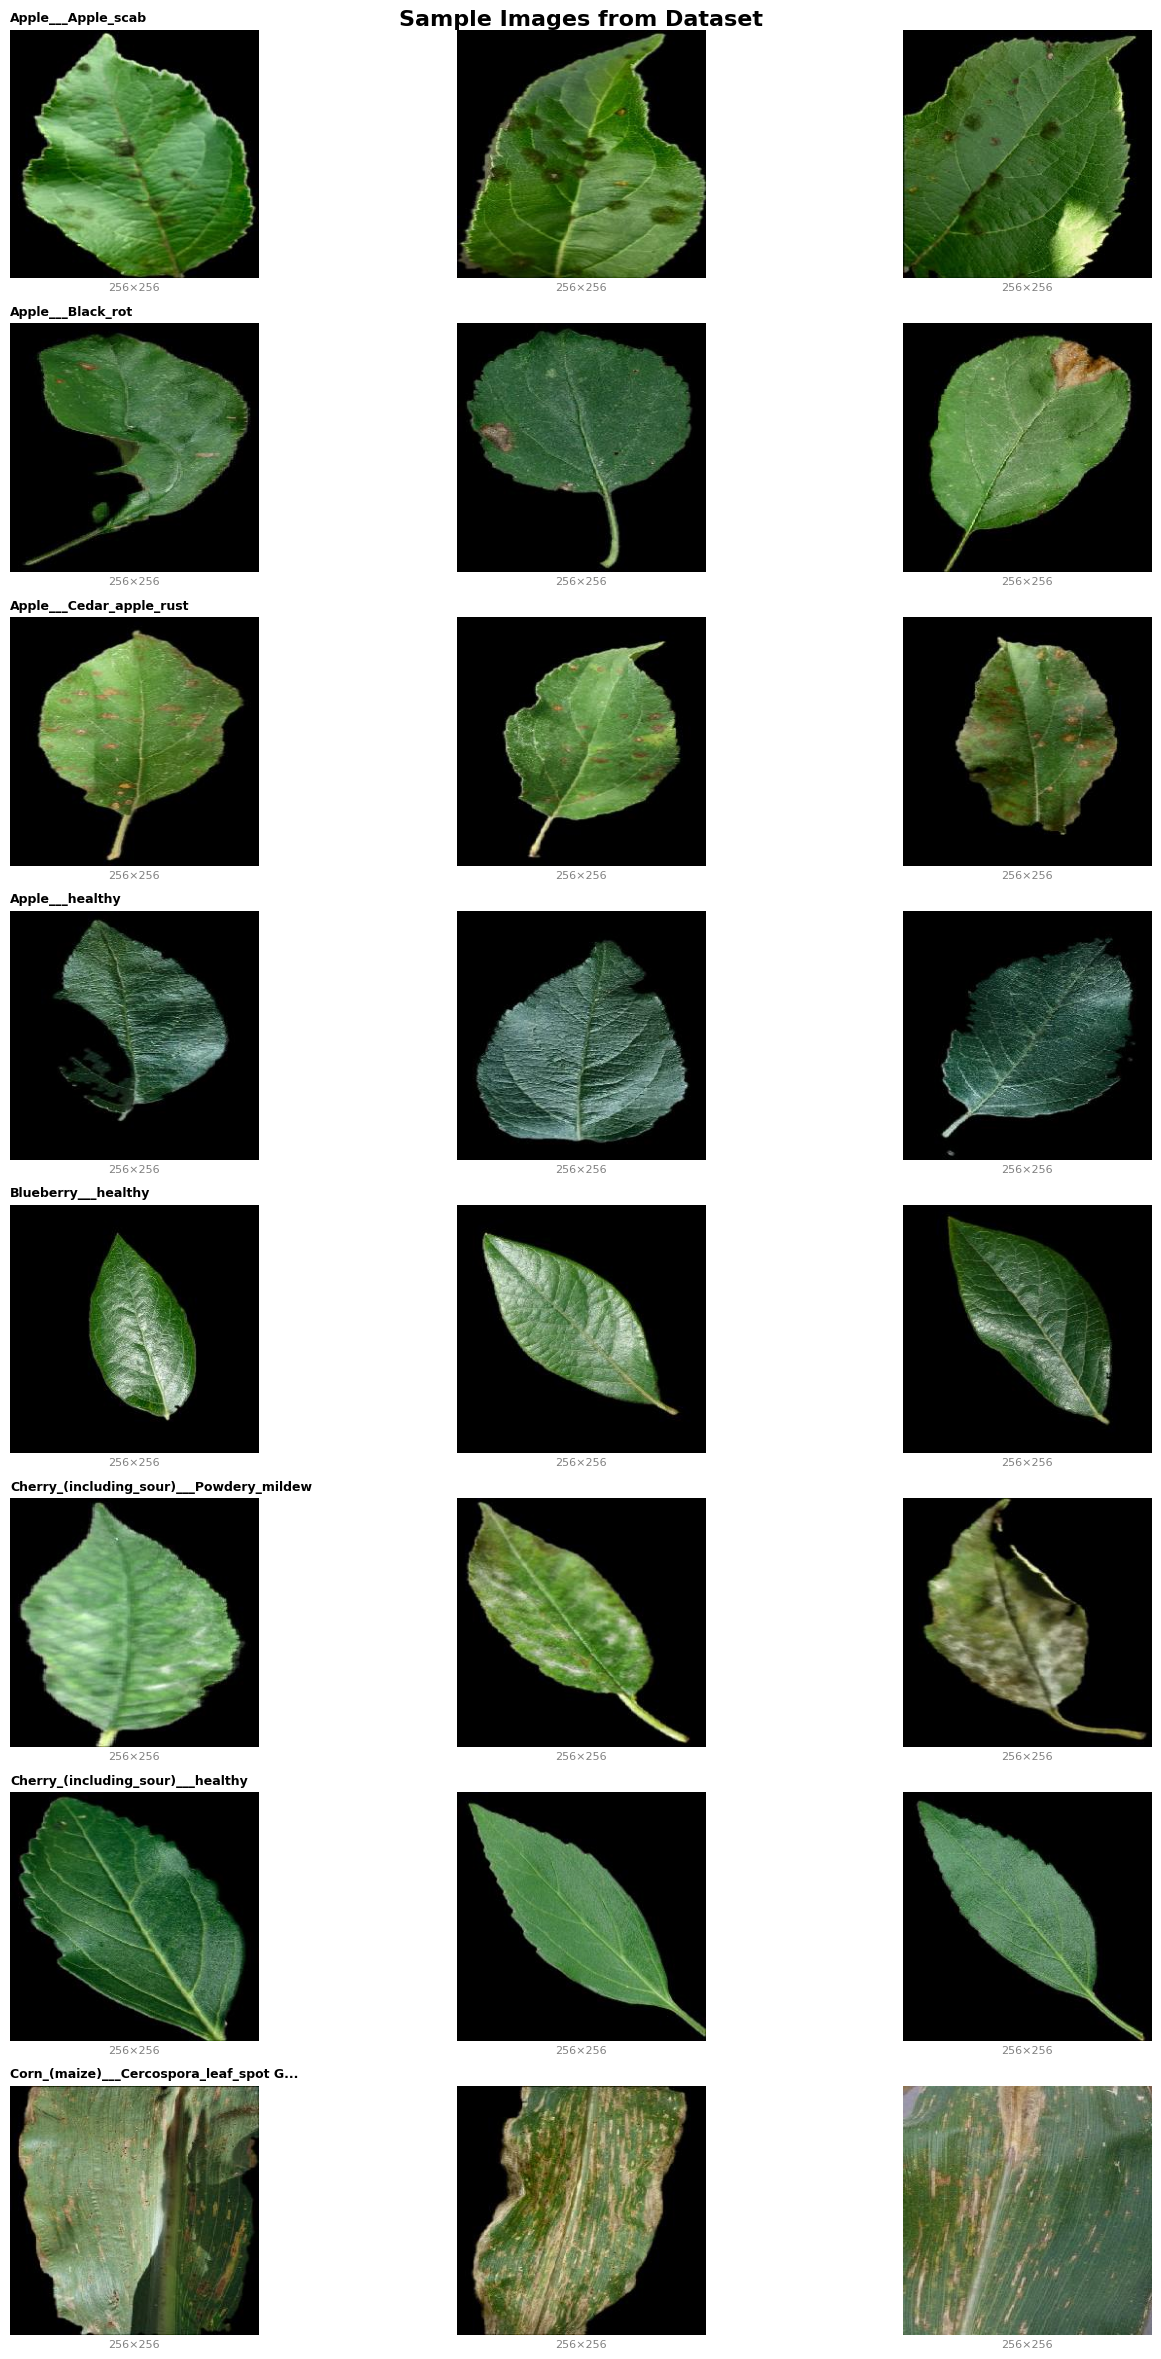

✅ Visualization saved to: /home/muhammad-noman/projects/plant_disease-gpu-env/outputs/sample_images.png

💡 Showing first 8 of 23 classes (alphabetical)


In [12]:
# === VISUALIZE SAMPLE IMAGES (local organized path) =========================
import os, random
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt  # if you get "plt not defined", this import fixes it

PROJECT_ROOT   = Path("/home/muhammad-noman/projects/plant_disease-gpu-env")
ORGANIZED_PATH = PROJECT_ROOT / "data" / "organized_dataset"
SAVE_PATH      = PROJECT_ROOT / "outputs" / "sample_images.png"
SAVE_PATH.parent.mkdir(parents=True, exist_ok=True)

def visualize_samples(organized_path: Path, samples_per_class: int = 3, max_classes: int = 8, shuffle_classes: bool = False):
    """Display sample images from up to max_classes classes, samples_per_class each."""
    print("\n🖼️  VISUALIZING SAMPLE IMAGES...")

    if not organized_path.exists():
        raise FileNotFoundError(f"Path not found: {organized_path}")

    class_dirs = sorted([d for d in organized_path.iterdir() if d.is_dir()], key=lambda p: p.name)
    if shuffle_classes:
        random.shuffle(class_dirs)
    display_dirs = class_dirs[:max_classes]

    if not display_dirs:
        raise RuntimeError("No class folders found in organized dataset.")

    # prepare subplot grid
    rows = len(display_dirs)
    cols = max(1, samples_per_class)
    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3), squeeze=False)
    fig.suptitle('Sample Images from Dataset', fontsize=16, fontweight='bold')

    exts = (".jpg", ".jpeg", ".png", ".JPG", ".JPEG", ".PNG")

    for i, class_dir in enumerate(display_dirs):
        all_images = [f for f in sorted(class_dir.iterdir()) if f.is_file() and f.suffix in exts]
        picks = all_images[:samples_per_class] if all_images else []

        # draw each pick
        for j in range(cols):
            ax = axes[i, j]
            if j < len(picks):
                img_path = picks[j]
                try:
                    with Image.open(img_path) as im:
                        im = im.convert("RGB")
                        ax.imshow(im)
                        ax.axis('off')
                        # left title once per row
                        if j == 0:
                            title = class_dir.name if len(class_dir.name) <= 40 else class_dir.name[:37] + "..."
                            ax.set_title(title, fontsize=9, fontweight='bold', loc='left')
                        # size note
                        ax.text(0.5, -0.05, f"{im.size[0]}×{im.size[1]}",
                                transform=ax.transAxes, ha='center', fontsize=8, color='gray')
                except Exception:
                    ax.text(0.5, 0.5, "Error loading image", ha='center', va='center')
                    ax.axis('off')
            else:
                ax.axis('off')  # no image for this cell

    plt.tight_layout()
    plt.savefig(SAVE_PATH, dpi=150, bbox_inches='tight')
    plt.show()
    print(f"✅ Visualization saved to: {SAVE_PATH}")

    total_classes = len(class_dirs)
    if total_classes > max_classes:
        print(f"\n💡 Showing first {max_classes} of {total_classes} classes "
              f"({'random order' if shuffle_classes else 'alphabetical'})")

# run it
visualize_samples(ORGANIZED_PATH, samples_per_class=3, max_classes=8, shuffle_classes=False)



📊 ANALYZING DATASET DISTRIBUTION...


/tmp/ipykernel_125205/2435965640.py:86: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/tmp/ipykernel_125205/2435965640.py:86: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/tmp/ipykernel_125205/2435965640.py:86: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/tmp/ipykernel_125205/2435965640.py:87: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  plt.savefig(SAVE_PATH, dpi=150, bbox_inches='tight')
/tmp/ipykernel_125205/2435965640.py:87: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans Mono.
  plt.savefig(SAVE_PATH, dpi=150, bbox_inches='tight')
/tmp/ipykernel_125205/2435965640.py:87: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) DejaVu Sans Mono.
  plt.savefig(SAVE_PATH, dpi=150, bbox_inches='ti

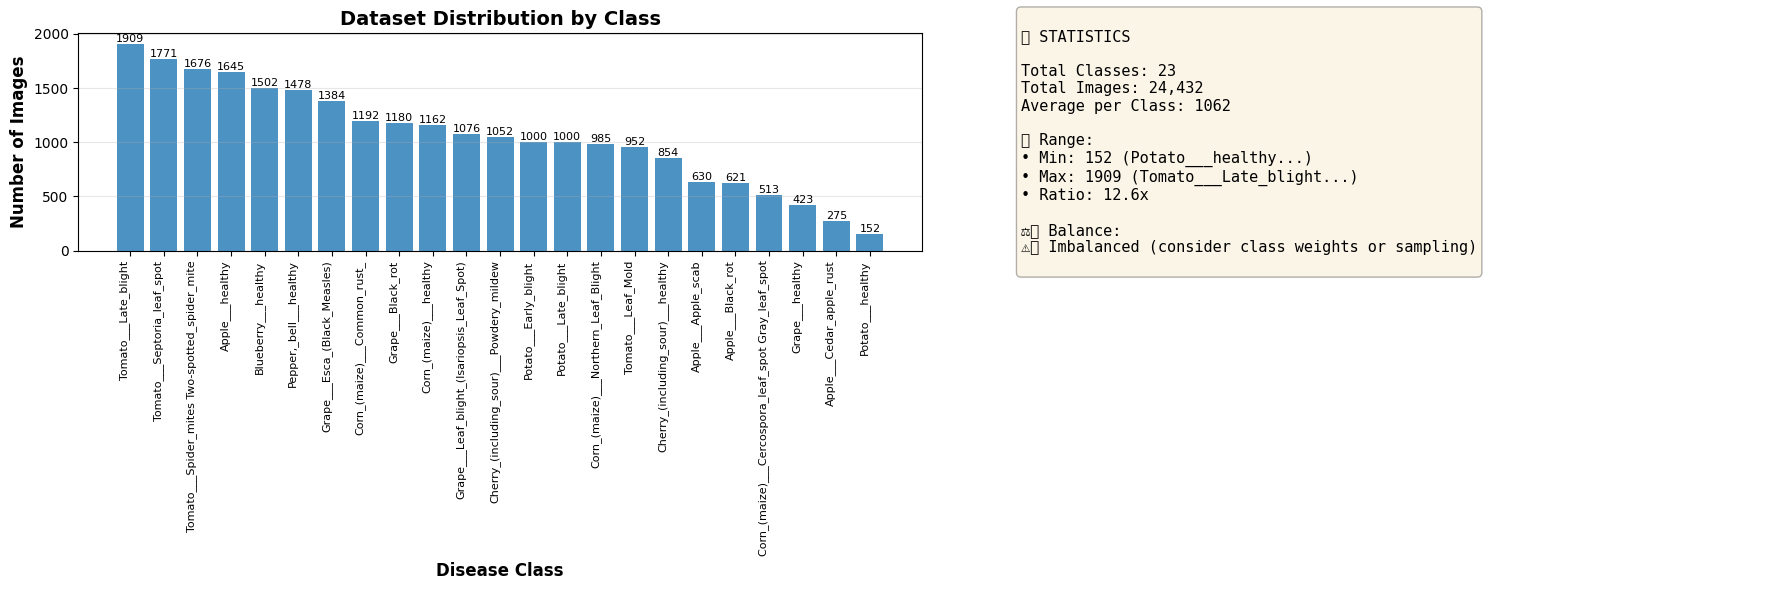

✅ Distribution analysis saved to: /home/muhammad-noman/projects/plant_disease-gpu-env/outputs/distribution_analysis.png


In [13]:
# === DATASET DISTRIBUTION ANALYSIS (local organized path) ===================
import os
from pathlib import Path
import matplotlib.pyplot as plt

PROJECT_ROOT   = Path("/home/muhammad-noman/projects/plant_disease-gpu-env")
ORGANIZED_PATH = PROJECT_ROOT / "data" / "organized_dataset"
SAVE_PATH      = PROJECT_ROOT / "outputs" / "distribution_analysis.png"
SAVE_PATH.parent.mkdir(parents=True, exist_ok=True)

def analyze_distribution(organized_path: Path):
    """Analyze and visualize dataset distribution."""
    if not organized_path.exists():
        raise FileNotFoundError(f"Path not found: {organized_path}")

    print("\n📊 ANALYZING DATASET DISTRIBUTION...")

    # collect classes
    class_folders = sorted([d.name for d in organized_path.iterdir() if d.is_dir()])
    if not class_folders:
        raise RuntimeError("No class folders found in organized dataset.")

    # count images per class
    exts = (".jpg", ".jpeg", ".png", ".JPG", ".JPEG", ".PNG")
    class_counts = {}
    for cls in class_folders:
        class_dir = organized_path / cls
        cnt = sum(1 for f in os.listdir(class_dir) if (class_dir / f).suffix in exts)
        class_counts[cls] = cnt

    # sort by frequency
    sorted_items = sorted(class_counts.items(), key=lambda kv: kv[1], reverse=True)
    sorted_classes = dict(sorted_items)

    # figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

    # bar chart
    xs = range(len(sorted_classes))
    vals = list(sorted_classes.values())
    ax1.bar(xs, vals, alpha=0.8)
    ax1.set_xlabel('Disease Class', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Number of Images', fontsize=12, fontweight='bold')
    ax1.set_title('Dataset Distribution by Class', fontsize=14, fontweight='bold')
    ax1.set_xticks(list(xs))
    ax1.set_xticklabels(list(sorted_classes.keys()), rotation=90, ha='right', fontsize=8)
    ax1.grid(axis='y', alpha=0.3)

    # add value labels
    for i, v in enumerate(vals):
        ax1.text(i, v, f'{int(v)}', ha='center', va='bottom', fontsize=8)

    # stats box
    total = sum(vals)
    avg = total / len(vals) if vals else 0
    min_count = min(vals) if vals else 0
    max_count = max(vals) if vals else 0
    # guard against empty
    min_class = next((k for k, v in sorted_classes.items() if v == min_count), "N/A")
    max_class = next((k for k, v in sorted_classes.items() if v == max_count), "N/A")
    ratio = (max_count / max(1, min_count)) if vals else 0.0

    stats_text = f"""
📊 STATISTICS

Total Classes: {len(sorted_classes)}
Total Images: {total:,}
Average per Class: {avg:.0f}

📈 Range:
• Min: {min_count} ({min_class[:30]}...)
• Max: {max_count} ({max_class[:30]}...)
• Ratio: {ratio:.1f}x

⚖️ Balance:
{'✅ Well-balanced' if ratio < 3 else '⚠️ Imbalanced (consider class weights or sampling)'}
"""
    ax2.text(
        0.1, 0.5, stats_text, transform=ax2.transAxes,
        fontsize=11, verticalalignment='center',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3),
        family='monospace'
    )
    ax2.axis('off')

    plt.tight_layout()
    plt.savefig(SAVE_PATH, dpi=150, bbox_inches='tight')
    plt.show()

    print(f"✅ Distribution analysis saved to: {SAVE_PATH}")
    return sorted_classes

# run
distribution = analyze_distribution(ORGANIZED_PATH)


In [14]:
# === FINAL SUMMARY REPORT (local) ===========================================
from pathlib import Path
from datetime import datetime

PROJECT_ROOT   = Path("/home/muhammad-noman/projects/plant_disease-gpu-env")
ORGANIZED_PATH = PROJECT_ROOT / "data" / "organized_dataset"
OUT_DIR        = PROJECT_ROOT / "outputs"
OUT_DIR.mkdir(parents=True, exist_ok=True)

def generate_summary_report(organized_path, format_stats, distribution):
    """Print and save a comprehensive dataset summary (local paths)."""
    # Safety checks
    if not organized_path.exists():
        raise FileNotFoundError(f"Organized path not found: {organized_path}")
    if not isinstance(distribution, dict) or len(distribution) == 0:
        raise ValueError("Distribution must be a non-empty dict of {class_name: count}.")

    # Aggregates
    total_images = sum(distribution.values())
    num_classes  = len(distribution)
    avg_per_cls  = (total_images // max(1, num_classes))

    # Build summary text
    lines = []
    sep = "=" * 70
    lines.append("\n" + sep)
    lines.append("📋 FINAL SUMMARY REPORT".center(70))
    lines.append(sep)
    lines.append(f"""
✅ DATASET READY FOR TRAINING!

📂 Location: {organized_path}

📊 Dataset Statistics:
   • Total Classes: {num_classes}
   • Total Images: {total_images:,}
   • Average per Class: {avg_per_cls}""")

    # Image formats
    lines.append("\n📸 Image Formats:")
    if total_images > 0 and format_stats:
        # sort formats by count desc
        for fmt, count in sorted(format_stats.items(), key=lambda kv: kv[1], reverse=True):
            pct = (count / total_images) * 100 if total_images else 0.0
            lines.append(f"   • {fmt}: {count:,} images ({pct:.1f}%)")
    else:
        lines.append("   • (no format stats available)")

    # Preprocessing & model notes (these are defaults you can tune)
    lines.append(f"""
⚙️  Preprocessing (applied during training):
   ✓ Resize to 224×224 pixels
   ✓ Normalize (ImageNet mean/std)
   ✓ Data Augmentation (flip, rotate, random crop)
   ✓ Using your existing Train/Val/Test folders (no re-split)

🎯 Model Configuration (initial plan):
   • Input Size: 224×224×3
   • Output Classes: {num_classes}
   • Architecture: EfficientNet-B0 (timm) to start
   • Mixed Precision (AMP): enabled (good for 4 GB VRAM)
""")

    # Save class names
    class_names_path = OUT_DIR / "class_names.txt"
    with open(class_names_path, "w", encoding="utf-8") as f:
        for cls in sorted(distribution.keys()):
            f.write(f"{cls}\n")

    lines.append(f"📝 Class Names saved to: {class_names_path}")

    # Small hint on imbalance
    if num_classes > 0 and total_images > 0:
        vals = list(distribution.values())
        min_c, max_c = min(vals), max(vals)
        ratio = (max_c / max(1, min_c))
        balance_line = "✅ Well-balanced" if ratio < 3 else "⚠️ Imbalanced (consider class weights or sampling)"
        lines.append(f"""
📈 Balance quick check:
   • Min per class: {min_c}
   • Max per class: {max_c}
   • Ratio (max/min): {ratio:.1f}x  → {balance_line}
""")

    lines.append(sep)
    lines.append("✅ READY TO PROCEED TO TRAINING!".center(70))
    lines.append(sep)

    # Print
    report_text = "\n".join(lines)
    print(report_text)

    # Save report text
    report_path = OUT_DIR / "summary_report.txt"
    with open(report_path, "w", encoding="utf-8") as f:
        f.write(f"# Summary generated: {datetime.now().isoformat()}\n")
        f.write(report_text)

    # Also save distribution as CSV
    dist_csv = OUT_DIR / "class_distribution.csv"
    with open(dist_csv, "w", encoding="utf-8") as f:
        f.write("class,count\n")
        for k, v in sorted(distribution.items(), key=lambda kv: kv[0]):
            f.write(f"{k},{v}\n")

    print(f"\n💾 Saved:")
    print(f"   • {report_path}")
    print(f"   • {class_names_path}")
    print(f"   • {dist_csv}")

    return {
        "report_path": str(report_path),
        "class_names_path": str(class_names_path),
        "distribution_csv": str(dist_csv),
    }

# Generate the report (uses variables you already computed earlier)
summary_paths = generate_summary_report(ORGANIZED_PATH, format_stats, distribution)



                        📋 FINAL SUMMARY REPORT                        

✅ DATASET READY FOR TRAINING!

📂 Location: /home/muhammad-noman/projects/plant_disease-gpu-env/data/organized_dataset

📊 Dataset Statistics:
   • Total Classes: 23
   • Total Images: 24,432
   • Average per Class: 1062

📸 Image Formats:
   • JPEG: 24,432 images (100.0%)

⚙️  Preprocessing (applied during training):
   ✓ Resize to 224×224 pixels
   ✓ Normalize (ImageNet mean/std)
   ✓ Data Augmentation (flip, rotate, random crop)
   ✓ Using your existing Train/Val/Test folders (no re-split)

🎯 Model Configuration (initial plan):
   • Input Size: 224×224×3
   • Output Classes: 23
   • Architecture: EfficientNet-B0 (timm) to start
   • Mixed Precision (AMP): enabled (good for 4 GB VRAM)

📝 Class Names saved to: /home/muhammad-noman/projects/plant_disease-gpu-env/outputs/class_names.txt

📈 Balance quick check:
   • Min per class: 152
   • Max per class: 1909
   • Ratio (max/min): 12.6x  → ⚠️ Imbalanced (consider class

In [15]:
# === STEP 9: Training Configuration (LOCAL) ================================
from pathlib import Path
import os, torch

# Project roots (LOCAL)
PROJECT_ROOT   = Path("/home/muhammad-noman/projects/plant_disease-gpu-env")
DATA_ROOT      = PROJECT_ROOT / "data"
ORGANIZED_PATH = DATA_ROOT / "organized_dataset"     # flat, one folder per class
TRAIN_DIR      = DATA_ROOT / "train"
VAL_DIR        = DATA_ROOT / "val"
TEST_DIR       = DATA_ROOT / "test"
MODEL_SAVE_PATH= PROJECT_ROOT / "models"
WORKING_DIR    = DATA_ROOT                            # keep data work here

# Ensure dirs exist
MODEL_SAVE_PATH.mkdir(parents=True, exist_ok=True)
WORKING_DIR.mkdir(parents=True, exist_ok=True)

# Decide whether you're using pre-made splits
USE_SPLITS = TRAIN_DIR.exists() and VAL_DIR.exists()

# Figure out how many classes
def count_classes_from_dir(d: Path):
    return len([p for p in d.iterdir() if p.is_dir()])

if USE_SPLITS and any(TRAIN_DIR.iterdir()):
    NUM_CLASSES = count_classes_from_dir(TRAIN_DIR)
else:
    # fallback to organized_dataset (flat class folders)
    NUM_CLASSES = count_classes_from_dir(ORGANIZED_PATH)

# Device
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# Choose conservative defaults for your Quadro T2000 (4 GB VRAM)
BATCH_SIZE   = 16   # increase to 24–32 if it fits; lower if OOM
NUM_WORKERS  = min(4, max(1, os.cpu_count() // 2))  # fair default

CONFIG = {
    # Paths
    "PROJECT_ROOT":   str(PROJECT_ROOT),
    "DATA_ROOT":      str(DATA_ROOT),
    "ORGANIZED_PATH": str(ORGANIZED_PATH),
    "TRAIN_DIR":      str(TRAIN_DIR),
    "VAL_DIR":        str(VAL_DIR),
    "TEST_DIR":       str(TEST_DIR),
    "MODEL_SAVE_PATH":str(MODEL_SAVE_PATH),
    "WORKING_DIR":    str(WORKING_DIR),

    # Data / model
    "IMG_SIZE": 224,
    "NUM_CLASSES": NUM_CLASSES,
    "BATCH_SIZE": BATCH_SIZE,
    "NUM_WORKERS": NUM_WORKERS,

    # Training
    "NUM_EPOCHS": 25,
    "LEARNING_RATE": 1e-4,
    "WEIGHT_DECAY": 1e-2,
    "AMP": True,                          # mixed precision (recommended)

    # Model (timm name; change freely)
    "MODEL_NAME": "efficientnet_b0",      # e.g., convnext_tiny / resnet50 / vit_tiny_patch16_224
    "PRETRAINED": True,

    # Splits (used only if you’re training from ORGANIZED_PATH)
    # If you already have data/train|val|test, these are ignored by our training script.
    "TRAIN_SPLIT": 0.70,
    "VAL_SPLIT":   0.15,
    "TEST_SPLIT":  0.15,

    # Device
    "DEVICE": DEVICE,
}

print("⚙️  Training Configuration (LOCAL):")
print("=" * 70)
for k, v in CONFIG.items():
    print(f"{k:<20} : {v}")
print("=" * 70)

# Helpful GPU readout
if DEVICE == "cuda":
    props = torch.cuda.get_device_properties(0)
    print(f"🔥 GPU: {torch.cuda.get_device_name(0)} | VRAM: {props.total_memory/1024**3:.2f} GB")
else:
    print("🖥️ Using CPU")


⚙️  Training Configuration (LOCAL):
PROJECT_ROOT         : /home/muhammad-noman/projects/plant_disease-gpu-env
DATA_ROOT            : /home/muhammad-noman/projects/plant_disease-gpu-env/data
ORGANIZED_PATH       : /home/muhammad-noman/projects/plant_disease-gpu-env/data/organized_dataset
TRAIN_DIR            : /home/muhammad-noman/projects/plant_disease-gpu-env/data/train
VAL_DIR              : /home/muhammad-noman/projects/plant_disease-gpu-env/data/val
TEST_DIR             : /home/muhammad-noman/projects/plant_disease-gpu-env/data/test
MODEL_SAVE_PATH      : /home/muhammad-noman/projects/plant_disease-gpu-env/models
WORKING_DIR          : /home/muhammad-noman/projects/plant_disease-gpu-env/data
IMG_SIZE             : 224
NUM_CLASSES          : 23
BATCH_SIZE           : 16
NUM_WORKERS          : 4
NUM_EPOCHS           : 25
LEARNING_RATE        : 0.0001
WEIGHT_DECAY         : 0.01
AMP                  : True
MODEL_NAME           : efficientnet_b0
PRETRAINED           : True
TRAIN_SPLIT

In [17]:
# --- AUTO-FIX TRAIN/VAL/TEST STRUCTURE -------------------------------------
import os, shutil, random
from pathlib import Path
from tqdm.auto import tqdm

PROJECT_ROOT = Path("/home/muhammad-noman/projects/plant_disease-gpu-env")
DATA_ROOT    = PROJECT_ROOT / "data"
TRAIN_DIR    = DATA_ROOT / "train"
VAL_DIR      = DATA_ROOT / "val"
TEST_DIR     = DATA_ROOT / "test"
ORG_DIR      = DATA_ROOT / "organized_dataset"   # flat classes

VAL_RATIO_FROM_TRAIN = 0.15
RANDOM_SEED = 42
IMAGE_EXTS = {".jpg",".jpeg",".png",".bmp",".tif",".tiff",".webp",".JPG",".JPEG",".PNG"}

def list_classes(p: Path):
    return sorted([d.name for d in p.iterdir() if d.is_dir()])

def list_images(p: Path):
    return sorted([f for f in p.iterdir() if f.is_file() and f.suffix in IMAGE_EXTS])

def has_class_dirs(root: Path) -> bool:
    return root.exists() and any(d.is_dir() for d in root.iterdir())

def has_images(root: Path) -> bool:
    if not root.exists(): return False
    for d in root.iterdir():
        if d.is_dir() and any((d/f).is_file() and (d/f).suffix in IMAGE_EXTS for f in d.iterdir()):
            return True
    return False

def find_nested_split_under(root: Path):
    """
    Try to detect nested splits like root/something/train|val|test/<class>/<img>.
    Returns (train_path, val_path, test_path) or (None, None, None)
    """
    if not root.exists(): return (None, None, None)
    # search one level down for a folder that contains train/val(/test)
    for sub in root.iterdir():
        if not sub.is_dir(): continue
        cand_train = sub / "train"
        cand_val   = sub / "val"
        cand_test  = sub / "test"
        if cand_train.exists() and cand_val.exists():
            return (cand_train, cand_val, cand_test if cand_test.exists() else None)
    return (None, None, None)

def copy_tree(src: Path, dst: Path):
    """Copy all class folders & files from src into dst, creating directories as needed."""
    dst.mkdir(parents=True, exist_ok=True)
    if not src or not src.exists(): return 0
    total = 0
    for cls in [d for d in src.iterdir() if d.is_dir()]:
        out_cls = dst / cls.name
        out_cls.mkdir(parents=True, exist_ok=True)
        for f in cls.iterdir():
            if f.is_file():
                target = out_cls / f.name
                if target.exists():
                    base, ext = os.path.splitext(f.name)
                    k = 1
                    while target.exists():
                        target = out_cls / f"{base}_{k}{ext}"
                        k += 1
                shutil.copy2(f, target)
                total += 1
    return total

def make_val_from_train(train_dir: Path, val_dir: Path, val_ratio: float):
    """Create validation by copying a stratified subset from train."""
    random.seed(RANDOM_SEED)
    val_dir.mkdir(parents=True, exist_ok=True)
    classes = list_classes(train_dir)
    if not classes:
        raise RuntimeError(f"No class folders found under {train_dir}")

    total_copied = 0
    print(f"\n📊 Creating validation split ({val_ratio*100:.0f}% of TRAIN) ...")
    for cls in tqdm(classes, desc="Classes"):
        src_cls = train_dir / cls
        dst_cls = val_dir / cls
        dst_cls.mkdir(parents=True, exist_ok=True)
        imgs = list_images(src_cls)
        if not imgs: 
            continue
        k = max(1, int(len(imgs) * val_ratio))
        picks = random.sample(imgs, k)
        for src in picks:
            dst = dst_cls / src.name
            if dst.exists():
                base, ext = os.path.splitext(src.name)
                c = 1
                while dst.exists():
                    dst = dst_cls / f"{base}_{c}{ext}"
                    c += 1
            shutil.copy2(src, dst)
            total_copied += 1
    print(f"✅ Validation created: {total_copied} images")

# ---- Diagnose current structure
print("\n🔎 Diagnosing data/ structure...")
print(f"Train dir: {TRAIN_DIR} (exists: {TRAIN_DIR.exists()})")
print(f"Val dir:   {VAL_DIR}   (exists: {VAL_DIR.exists()})")
print(f"Test dir:  {TEST_DIR}  (exists: {TEST_DIR.exists()})")

# 1) If train has no class subfolders, try to lift nested split folders
fixed = False
if TRAIN_DIR.exists() and not has_class_dirs(TRAIN_DIR):
    print("ℹ️  data/train exists but has no class folders. Searching for nested splits...")
    n_train, n_val, n_test = find_nested_split_under(TRAIN_DIR)
    if n_train and has_class_dirs(n_train):
        print(f"📦 Found nested split under: {n_train.parent}")
        copied_tr = copy_tree(n_train, TRAIN_DIR)
        print(f"   → Copied {copied_tr} files into {TRAIN_DIR}")
        if n_val and has_class_dirs(n_val):
            copied_vl = copy_tree(n_val, VAL_DIR)
            print(f"   → Copied {copied_vl} files into {VAL_DIR}")
        if n_test and has_class_dirs(n_test):
            copied_ts = copy_tree(n_test, TEST_DIR)
            print(f"   → Copied {copied_ts} files into {TEST_DIR}")
        fixed = True
    else:
        print("   No nested split found under data/train.")

# 2) If still no class folders in train, but organized_dataset exists, split from it
if TRAIN_DIR.exists() and not has_class_dirs(TRAIN_DIR):
    if ORG_DIR.exists() and has_class_dirs(ORG_DIR):
        print(f"🧭 Creating splits from {ORG_DIR} (stratified copy).")
        # create train/val/test from organized_dataset using 70/15/15
        TRAIN_DIR.mkdir(parents=True, exist_ok=True)
        VAL_DIR.mkdir(parents=True, exist_ok=True)
        TEST_DIR.mkdir(parents=True, exist_ok=True)

        random.seed(RANDOM_SEED)
        for cls in tqdm(list_classes(ORG_DIR), desc="Classes"):
            src_cls = ORG_DIR / cls
            imgs = [f for f in src_cls.iterdir() if f.is_file() and f.suffix in IMAGE_EXTS]
            if not imgs: 
                continue
            random.shuffle(imgs)
            n = len(imgs)
            n_train = int(n * 0.70)
            n_val   = int(n * 0.15)
            tr, vl, ts = imgs[:n_train], imgs[n_train:n_train+n_val], imgs[n_train+n_val:]

            for split_name, files in (("train", tr), ("val", vl), ("test", ts)):
                out_dir = {"train": TRAIN_DIR, "val": VAL_DIR, "test": TEST_DIR}[split_name] / cls
                out_dir.mkdir(parents=True, exist_ok=True)
                for src in files:
                    dst = out_dir / src.name
                    if dst.exists():
                        base, ext = os.path.splitext(src.name)
                        k = 1
                        while dst.exists():
                            dst = out_dir / f"{base}_{k}{ext}"
                            k += 1
                    shutil.copy2(src, dst)
        fixed = True
        print("✅ Splits created from organized_dataset.")
    else:
        print("❌ No class folders in train and no organized_dataset to split from.")

# 3) Ensure val exists; if empty, create from train
def dir_empty_or_no_images(p: Path) -> bool:
    return (not p.exists()) or (not has_images(p))

if dir_empty_or_no_images(VAL_DIR):
    print("ℹ️  Validation missing or empty → creating from train.")
    make_val_from_train(TRAIN_DIR, VAL_DIR, VAL_RATIO_FROM_TRAIN)
else:
    print("✅ Validation set is present.")

print("\n📁 Final split directories:")
print(f"   Train: {TRAIN_DIR}")
print(f"   Val:   {VAL_DIR}")
print(f"   Test:  {TEST_DIR}")



🔎 Diagnosing data/ structure...
Train dir: /home/muhammad-noman/projects/plant_disease-gpu-env/data/train (exists: True)
Val dir:   /home/muhammad-noman/projects/plant_disease-gpu-env/data/val   (exists: True)
Test dir:  /home/muhammad-noman/projects/plant_disease-gpu-env/data/test  (exists: True)
ℹ️  data/train exists but has no class folders. Searching for nested splits...
   No nested split found under data/train.
🧭 Creating splits from /home/muhammad-noman/projects/plant_disease-gpu-env/data/organized_dataset (stratified copy).


Classes: 100%|██████████| 23/23 [00:02<00:00,  9.15it/s]

✅ Splits created from organized_dataset.
✅ Validation set is present.

📁 Final split directories:
   Train: /home/muhammad-noman/projects/plant_disease-gpu-env/data/train
   Val:   /home/muhammad-noman/projects/plant_disease-gpu-env/data/val
   Test:  /home/muhammad-noman/projects/plant_disease-gpu-env/data/test


In [18]:
# === STEP 11: Data Augmentation & DataLoaders (LOCAL) ======================
import os
from pathlib import Path
import torch
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

# Use the CONFIG and dirs from earlier cells; fall back if missing
try:
    PROJECT_ROOT = Path(CONFIG.get("PROJECT_ROOT", "/home/muhammad-noman/projects/plant_disease-gpu-env"))
except NameError:
    PROJECT_ROOT = Path("/home/muhammad-noman/projects/plant_disease-gpu-env")

DATA_ROOT = PROJECT_ROOT / "data"
train_dir = DATA_ROOT / "train"
val_dir   = DATA_ROOT / "val"
test_dir  = DATA_ROOT / "test"

# Basic safety checks
for p in [train_dir, val_dir, test_dir]:
    if not p.exists():
        raise FileNotFoundError(f"Missing folder: {p}. Make sure Step 10 created your splits.")

# Pull settings from CONFIG (with sensible defaults)
IMG_SIZE     = int(CONFIG.get("IMG_SIZE", 224)) if 'CONFIG' in globals() else 224
BATCH_SIZE   = int(CONFIG.get("BATCH_SIZE", 16)) if 'CONFIG' in globals() else 16
NUM_WORKERS  = int(CONFIG.get("NUM_WORKERS", min(4, os.cpu_count() or 1))) if 'CONFIG' in globals() else min(4, os.cpu_count() or 1)
DEVICE       = CONFIG.get("DEVICE", "cuda" if torch.cuda.is_available() else "cpu") if 'CONFIG' in globals() else ("cuda" if torch.cuda.is_available() else "cpu")

# --- Transforms ---
# Tip: RandomResizedCrop adds stronger scale/position variety than plain Resize+Rotate
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(IMG_SIZE, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.3),
    transforms.RandomRotation(degrees=20),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomAffine(degrees=0, translate=(0.08, 0.08)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

val_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

print("✅ Data Augmentation Setup:")
print("   Training: RandomResizedCrop, Flip(H/V), Rotate, ColorJitter, Affine, Normalize")
print("   Val/Test: Resize, Normalize only")

# --- Datasets ---
train_dataset = datasets.ImageFolder(str(train_dir), transform=train_transform)
val_dataset   = datasets.ImageFolder(str(val_dir),   transform=val_transform)
test_dataset  = datasets.ImageFolder(str(test_dir),  transform=val_transform)

class_names = train_dataset.classes
num_classes = len(class_names)

print(f"\n📊 Dataset Sizes:")
print(f"   Train: {len(train_dataset)} images")
print(f"   Val:   {len(val_dataset)} images")
print(f"   Test:  {len(test_dataset)} images")
print(f"   Classes: {num_classes}")

# --- DataLoaders ---
# Good defaults for GPU: pin_memory + persistent_workers (when workers > 0)
pin = (DEVICE == "cuda")
persistent = NUM_WORKERS > 0

train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS,
    pin_memory=pin,
    persistent_workers=persistent,
    prefetch_factor=2 if NUM_WORKERS > 0 else None,
)

val_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS,
    pin_memory=pin,
    persistent_workers=persistent,
    prefetch_factor=2 if NUM_WORKERS > 0 else None,
)

test_loader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS,
    pin_memory=pin,
    persistent_workers=persistent,
    prefetch_factor=2 if NUM_WORKERS > 0 else None,
)

print(f"\n✅ DataLoaders Created:")
print(f"   Train batches: {len(train_loader)}")
print(f"   Val batches:   {len(val_loader)}")
print(f"   Test batches:  {len(test_loader)}")

# sanity: show a tiny batch shape (no heavy ops)
xb, yb = next(iter(train_loader))
print(f"\n🧪 Sanity batch → images: {tuple(xb.shape)}, labels: {yb.shape}, device: {DEVICE}")
del xb, yb  # free RAM/VRAM


✅ Data Augmentation Setup:
   Training: RandomResizedCrop, Flip(H/V), Rotate, ColorJitter, Affine, Normalize
   Val/Test: Resize, Normalize only

📊 Dataset Sizes:
   Train: 17094 images
   Val:   3654 images
   Test:  3684 images
   Classes: 23

✅ DataLoaders Created:
   Train batches: 1069
   Val batches:   229
   Test batches:  231

🧪 Sanity batch → images: (16, 3, 224, 224), labels: torch.Size([16]), device: cuda


In [1]:
# === STEP A: Duplicate Audit (exact duplicates by SHA-1) ====================
from pathlib import Path
from concurrent.futures import ThreadPoolExecutor, as_completed
import hashlib, csv, os
from collections import defaultdict

PROJECT_ROOT = Path("/home/muhammad-noman/projects/plant_disease-gpu-env")
DATA_ROOT    = PROJECT_ROOT / "data"
TRAIN_DIR    = DATA_ROOT / "train"
VAL_DIR      = DATA_ROOT / "val"
TEST_DIR     = DATA_ROOT / "test"
REPORTS_DIR  = PROJECT_ROOT / "outputs"
REPORTS_DIR.mkdir(parents=True, exist_ok=True)

EXTS = {".jpg",".jpeg",".png",".bmp",".tif",".tiff",".webp",".JPG",".JPEG",".PNG"}

def list_images(root: Path):
    files = []
    for cls in sorted(p for p in root.iterdir() if p.is_dir()):
        for f in cls.rglob("*"):
            if f.suffix in EXTS and f.is_file():
                files.append(f)
    return files

def sha1_file(path: Path, buf_size=1<<20):
    h = hashlib.sha1()
    with open(path, "rb") as f:
        while True:
            b = f.read(buf_size)
            if not b:
                break
            h.update(b)
    return h.hexdigest()

def hash_many(paths, max_workers=8):
    results = {}
    with ThreadPoolExecutor(max_workers=max_workers) as ex:
        fut2p = {ex.submit(sha1_file, p): p for p in paths}
        for fut in as_completed(fut2p):
            p = fut2p[fut]
            try:
                results[p] = fut.result()
            except Exception as e:
                print("⚠️ hash error:", p, e)
    return results

def index_by_hash(file2hash):
    by_hash = defaultdict(list)
    for p, h in file2hash.items():
        by_hash[h].append(p)
    return by_hash

def summarize_duplicates(by_hash):
    # any hash that maps to >= 2 files is a duplicate group
    dups = {h: ps for h, ps in by_hash.items() if len(ps) >= 2}
    count_files = sum(len(v) for v in dups.values())
    return dups, count_files

def split_of(p: Path):
    # returns 'train' / 'val' / 'test' given canonical layout
    parts = p.parts
    # find index of 'data' and take the next part
    try:
        i = parts.index("data")
        return parts[i+1]
    except Exception:
        # fallback: infer by containment
        if str(TRAIN_DIR) in str(p): return "train"
        if str(VAL_DIR) in str(p):   return "val"
        if str(TEST_DIR) in str(p):  return "test"
        return "unknown"

# 1) collect files
train_files = list_images(TRAIN_DIR)
val_files   = list_images(VAL_DIR)
test_files  = list_images(TEST_DIR)
print(f"📁 Files → train: {len(train_files)} | val: {len(val_files)} | test: {len(test_files)}")

# 2) hash them (multithreaded)
print("🔑 Hashing train…"); h_train = hash_many(train_files, max_workers=os.cpu_count() or 8)
print("🔑 Hashing val…");   h_val   = hash_many(val_files,   max_workers=os.cpu_count() or 8)
print("🔑 Hashing test…");  h_test  = hash_many(test_files,  max_workers=os.cpu_count() or 8)

# 3) index by hash
by_hash_train = index_by_hash(h_train)
by_hash_val   = index_by_hash(h_val)
by_hash_test  = index_by_hash(h_test)

# 4) within-split duplicates
dups_train, n_train_dup_files = summarize_duplicates(by_hash_train)
dups_val,   n_val_dup_files   = summarize_duplicates(by_hash_val)
dups_test,  n_test_dup_files  = summarize_duplicates(by_hash_test)

print("\n🔁 Within-split duplicates (exact same image content):")
print(f"   train: {len(dups_train)} groups, {n_train_dup_files} files")
print(f"   val  : {len(dups_val)} groups,   {n_val_dup_files} files")
print(f"   test : {len(dups_test)} groups,  {n_test_dup_files} files")

# 5) cross-split duplicates
#    compute intersection of hash sets
H_train = set(h_train.values()); H_val = set(h_val.values()); H_test = set(h_test.values())
tv = H_train & H_val
tt = H_train & H_test
vt = H_val & H_test

def expand_groups(hashes, pools):
    # pools is list of dicts mapping hash->paths
    groups = {}
    for h in hashes:
        acc = []
        for pool in pools:
            acc.extend(pool.get(h, []))
        groups[h] = acc
    return groups

cross_tv = expand_groups(tv, [by_hash_train, by_hash_val])
cross_tt = expand_groups(tt, [by_hash_train, by_hash_test])
cross_vt = expand_groups(vt, [by_hash_val,   by_hash_test])

print("\n🌉 Cross-split duplicates (train↔val / train↔test / val↔test):")
print(f"   train ∩ val : {len(cross_tv)} hashes")
print(f"   train ∩ test: {len(cross_tt)} hashes")
print(f"   val   ∩ test: {len(cross_vt)} hashes")

# 6) write reports
def write_groups_csv(groups, csv_path):
    with open(csv_path, "w", newline="", encoding="utf-8") as f:
        w = csv.writer(f)
        w.writerow(["hash","split","class","path"])
        for h, paths in groups.items():
            for p in paths:
                sp = split_of(p)
                # class is the folder right under split dir
                # .../data/<split>/<class>/<file>
                cls = p.parent.name
                w.writerow([h, sp, cls, str(p)])

reports = {
    "within_train": (dups_train, REPORTS_DIR/"duplicates_within_train.csv"),
    "within_val":   (dups_val,   REPORTS_DIR/"duplicates_within_val.csv"),
    "within_test":  (dups_test,  REPORTS_DIR/"duplicates_within_test.csv"),
    "cross_tv":     (cross_tv,   REPORTS_DIR/"duplicates_cross_train_val.csv"),
    "cross_tt":     (cross_tt,   REPORTS_DIR/"duplicates_cross_train_test.csv"),
    "cross_vt":     (cross_vt,   REPORTS_DIR/"duplicates_cross_val_test.csv"),
}
for name, (groups, out) in reports.items():
    write_groups_csv(groups, out)

print("\n📝 CSV reports saved in:", REPORTS_DIR)
for _, (_, out) in reports.items():
    print("   -", out)

# 7) show a few examples if any cross-split dups exist
def show_examples(groups, title, k=5):
    keys = list(groups.keys())
    if not keys:
        print(f"\n✅ No {title} duplicates.")
        return
    print(f"\n⚠️ Examples of {title} duplicates:")
    for i, h in enumerate(keys[:k], 1):
        paths = groups[h]
        tags = [f"{split_of(p)}::{p.parent.name}::{p.name}" for p in paths]
        print(f"{i}. hash:{h[:10]}…  →  " + "  |  ".join(tags))

show_examples(cross_tv, "train↔val")
show_examples(cross_tt, "train↔test")
show_examples(cross_vt, "val↔test")


📁 Files → train: 17094 | val: 3654 | test: 3684
🔑 Hashing train…
🔑 Hashing val…
🔑 Hashing test…

🔁 Within-split duplicates (exact same image content):
   train: 7 groups, 14 files
   val  : 2 groups,   4 files
   test : 0 groups,  0 files

🌉 Cross-split duplicates (train↔val / train↔test / val↔test):
   train ∩ val : 4 hashes
   train ∩ test: 1 hashes
   val   ∩ test: 1 hashes

📝 CSV reports saved in: /home/muhammad-noman/projects/plant_disease-gpu-env/outputs
   - /home/muhammad-noman/projects/plant_disease-gpu-env/outputs/duplicates_within_train.csv
   - /home/muhammad-noman/projects/plant_disease-gpu-env/outputs/duplicates_within_val.csv
   - /home/muhammad-noman/projects/plant_disease-gpu-env/outputs/duplicates_within_test.csv
   - /home/muhammad-noman/projects/plant_disease-gpu-env/outputs/duplicates_cross_train_val.csv
   - /home/muhammad-noman/projects/plant_disease-gpu-env/outputs/duplicates_cross_train_test.csv
   - /home/muhammad-noman/projects/plant_disease-gpu-env/outputs/d

In [2]:
# === STEP B: Clean duplicates safely (quarantine, not delete) ===============
from pathlib import Path
from concurrent.futures import ThreadPoolExecutor, as_completed
import hashlib, os, shutil
from collections import defaultdict, Counter

PROJECT_ROOT = Path("/home/muhammad-noman/projects/plant_disease-gpu-env")
DATA_ROOT    = PROJECT_ROOT / "data"
TRAIN_DIR    = DATA_ROOT / "train"
VAL_DIR      = DATA_ROOT / "val"
TEST_DIR     = DATA_ROOT / "test"
QUAR_DIR     = PROJECT_ROOT / "outputs" / "quarantine_dups"
QUAR_DIR.mkdir(parents=True, exist_ok=True)

EXTS = {".jpg",".jpeg",".png",".bmp",".tif",".tiff",".webp",".JPG",".JPEG",".PNG"}

def list_images(root: Path):
    files = []
    for cls in sorted(p for p in root.iterdir() if p.is_dir()):
        for f in cls.rglob("*"):
            if f.suffix in EXTS and f.is_file():
                files.append(f)
    return files

def sha1_file(path: Path, buf_size=1<<20):
    h = hashlib.sha1()
    with open(path, "rb") as f:
        while True:
            b = f.read(buf_size)
            if not (chunk := f.read(buf_size)): break
            h.update(chunk)
    return h.hexdigest()

def hash_many(paths, max_workers=os.cpu_count() or 8):
    results = {}
    with ThreadPoolExecutor(max_workers=max_workers) as ex:
        fut2p = {ex.submit(sha1_file, p): p for p in paths}
        for fut in as_completed(fut2p):
            p = fut2p[fut]
            try:
                results[p] = fut.result()
            except Exception as e:
                print("⚠️ hash error:", p, e)
    return results

def split_of(p: Path):
    pstr = str(p)
    if str(TEST_DIR) in pstr: return "test"
    if str(VAL_DIR)  in pstr: return "val"
    if str(TRAIN_DIR)in pstr: return "train"
    return "unknown"

def choose_keep(paths):
    """Choose exactly ONE file to keep with priority test > val > train."""
    buckets = {"test": [], "val": [], "train": [], "unknown": []}
    for p in paths:
        buckets[split_of(p)].append(p)
    for k in ("test","val","train","unknown"):
        if buckets[k]:
            # heuristic: keep the shortest path (arbitrary but deterministic)
            return sorted(buckets[k], key=lambda x: len(str(x)))[0]
    return paths[0]

def move_to_quarantine(p: Path, h: str):
    # preserve split/class folder structure under quarantine, add hash prefix to filename
    sp = split_of(p)
    cls = p.parent.name
    out_dir = QUAR_DIR / sp / cls
    out_dir.mkdir(parents=True, exist_ok=True)
    new_name = f"{h[:10]}__{p.name}"
    dst = out_dir / new_name
    # avoid name clashes
    i = 1
    while dst.exists():
        dst = out_dir / f"{h[:10]}__{i}__{p.name}"
        i += 1
    shutil.move(str(p), str(dst))
    return dst

# 1) Hash everything
train_files = list_images(TRAIN_DIR)
val_files   = list_images(VAL_DIR)
test_files  = list_images(TEST_DIR)
print(f"📁 Files → train:{len(train_files)} | val:{len(val_files)} | test:{len(test_files)}")

print("🔑 Hashing train…"); h_train = hash_many(train_files)
print("🔑 Hashing val…");   h_val   = hash_many(val_files)
print("🔑 Hashing test…");  h_test  = hash_many(test_files)

# 2) Build global index: hash -> list[Path]
by_hash = defaultdict(list)
for p,h in h_train.items(): by_hash[h].append(p)
for p,h in h_val.items():   by_hash[h].append(p)
for p,h in h_test.items():  by_hash[h].append(p)

# 3) Decide keeps & quarantine others
to_keep = {}
to_quar = []

for h, paths in by_hash.items():
    if len(paths) <= 1:
        continue  # unique
    keep = choose_keep(paths)
    to_keep[h] = keep
    for p in paths:
        if p != keep:
            to_quar.append((h, p))

print(f"\n🔁 Duplicate hashes (global): {len(to_keep)}")
print(f"   → Will keep 1 per hash, quarantine {len(to_quar)} files")

# 4) Execute moves
moved = []
for h, p in to_quar:
    try:
        dst = move_to_quarantine(p, h)
        moved.append((p, dst))
    except Exception as e:
        print("❌ move error:", p, e)

print(f"\n📦 Quarantined files: {len(moved)}")
if moved[:5]:
    print("   Examples:")
    for src, dst in moved[:5]:
        print("   -", src, "→", dst)

# 5) Re-audit quickly to confirm zero cross-split dupes
H_train = set(sha1_file(p) for p in list_images(TRAIN_DIR))
H_val   = set(sha1_file(p) for p in list_images(VAL_DIR))
H_test  = set(sha1_file(p) for p in list_images(TEST_DIR))

tv = H_train & H_val
tt = H_train & H_test
vt = H_val & H_test

print("\n✅ Post-clean cross-split overlap (should be 0):")
print(f"   train ∩ val : {len(tv)}")
print(f"   train ∩ test: {len(tt)}")
print(f"   val   ∩ test: {len(vt)}")

# 6) Within-split cleanup (optional, stricter):
#    After cross-split cleaning, you may still have *within* split duplicates.
#    We'll keep one per hash in each split and quarantine extra copies.
def clean_within_split(root: Path):
    files = list_images(root)
    file2hash = hash_many(files)
    by_h = defaultdict(list)
    for p,h in file2hash.items():
        by_h[h].append(p)
    extras = []
    for h, ps in by_h.items():
        if len(ps) > 1:
            keep = sorted(ps, key=lambda x: len(str(x)))[0]
            extras.extend((h, p) for p in ps if p != keep)
    for h,p in extras:
        move_to_quarantine(p, h)
    return len(extras)

w_train = clean_within_split(TRAIN_DIR)
w_val   = clean_within_split(VAL_DIR)
w_test  = clean_within_split(TEST_DIR)

print(f"\n🧹 Within-split extras quarantined → train:{w_train} | val:{w_val} | test:{w_test}")
print(f"🗂️  Quarantine folder: {QUAR_DIR}")


📁 Files → train:17094 | val:3654 | test:3684
🔑 Hashing train…
🔑 Hashing val…
🔑 Hashing test…

🔁 Duplicate hashes (global): 1
   → Will keep 1 per hash, quarantine 24431 files

📦 Quarantined files: 24431
   Examples:
   - /home/muhammad-noman/projects/plant_disease-gpu-env/data/train/Pepper,_bell___healthy/1d0430f7-af9b-4e3d-9d4a-47cf676556fe___JR_HL 5938_final_masked.jpg → /home/muhammad-noman/projects/plant_disease-gpu-env/outputs/quarantine_dups/train/Pepper,_bell___healthy/da39a3ee5e__1d0430f7-af9b-4e3d-9d4a-47cf676556fe___JR_HL 5938_final_masked.jpg
   - /home/muhammad-noman/projects/plant_disease-gpu-env/data/train/Grape___Black_rot/98f4ba39-5593-47ae-ad38-9d0dfb8da853___FAM_B.Rot 3430_final_masked.jpg → /home/muhammad-noman/projects/plant_disease-gpu-env/outputs/quarantine_dups/train/Grape___Black_rot/da39a3ee5e__98f4ba39-5593-47ae-ad38-9d0dfb8da853___FAM_B.Rot 3430_final_masked.jpg
   - /home/muhammad-noman/projects/plant_disease-gpu-env/data/train/Apple___Black_rot/977c9b03-47f

In [3]:
# === STEP B-REVERT: Restore files from quarantine back to data =============
from pathlib import Path
import shutil, re

PROJECT_ROOT = Path("/home/muhammad-noman/projects/plant_disease-gpu-env")
DATA_ROOT    = PROJECT_ROOT / "data"
TRAIN_DIR    = DATA_ROOT / "train"
VAL_DIR      = DATA_ROOT / "val"
TEST_DIR     = DATA_ROOT / "test"
QUAR_DIR     = PROJECT_ROOT / "outputs" / "quarantine_dups"

assert QUAR_DIR.exists(), f"Quarantine not found: {QUAR_DIR}"

# pattern we used: "<hash[:10]>__<optional-i__><original_name>"
prefix_re = re.compile(r"^[0-9a-f]{10}__(?:\d+__)?")

def restore_one(p: Path):
    # p looks like: QUAR_DIR/<split>/<class>/<prefixed-filename>
    split = p.parent.parent.name   # split folder
    cls   = p.parent.name          # class folder
    orig  = prefix_re.sub("", p.name)  # strip our prefix back to original filename
    dst_dir = DATA_ROOT / split / cls
    dst_dir.mkdir(parents=True, exist_ok=True)
    dst = dst_dir / orig

    # avoid overwriting if a file with same name exists
    if dst.exists():
        stem, suf = dst.stem, dst.suffix
        i = 1
        while dst.exists():
            dst = dst_dir / f"{stem}_restored{i}{suf}"
            i += 1
    shutil.move(str(p), str(dst))
    return dst

moved = 0
for split_dir in QUAR_DIR.iterdir():
    if not split_dir.is_dir(): 
        continue
    for cls_dir in split_dir.iterdir():
        if not cls_dir.is_dir():
            continue
        for f in cls_dir.rglob("*"):
            if f.is_file():
                restore_one(f)
                moved += 1

print(f"✅ Restored {moved} files from quarantine: {QUAR_DIR}")
print("   You can keep the quarantine folders (now empty) or delete them later.")


✅ Restored 24431 files from quarantine: /home/muhammad-noman/projects/plant_disease-gpu-env/outputs/quarantine_dups
   You can keep the quarantine folders (now empty) or delete them later.


In [4]:
# === STEP B2: Correct duplicate audit + safe clean ==========================
from pathlib import Path
from concurrent.futures import ThreadPoolExecutor, as_completed
import hashlib, os, shutil
from collections import defaultdict

PROJECT_ROOT = Path("/home/muhammad-noman/projects/plant_disease-gpu-env")
DATA_ROOT    = PROJECT_ROOT / "data"
TRAIN_DIR    = DATA_ROOT / "train"
VAL_DIR      = DATA_ROOT / "val"
TEST_DIR     = DATA_ROOT / "test"
QUAR_DIR     = PROJECT_ROOT / "outputs" / "quarantine_dups"
QUAR_DIR.mkdir(parents=True, exist_ok=True)

EXTS = {".jpg",".jpeg",".png",".bmp",".tif",".tiff",".webp",".JPG",".JPEG",".PNG"}

def list_images(root: Path):
    files = []
    for cls in sorted(p for p in root.iterdir() if p.is_dir()):
        for f in cls.rglob("*"):
            if f.suffix in EXTS and f.is_file():
                files.append(f)
    return files

def sha1_file(path: Path, buf_size=1<<20):
    h = hashlib.sha1()
    with open(path, "rb") as f:
        for chunk in iter(lambda: f.read(buf_size), b""):
            h.update(chunk)
    return h.hexdigest()

def hash_many(paths, max_workers=os.cpu_count() or 8):
    out = {}
    with ThreadPoolExecutor(max_workers=max_workers) as ex:
        fut = {ex.submit(sha1_file, p): p for p in paths}
        for f in as_completed(fut):
            p = fut[f]
            try:
                out[p] = f.result()
            except Exception as e:
                print("⚠️ hash error:", p, e)
    return out

def split_of(p: Path):
    s = str(p)
    if str(TEST_DIR) in s: return "test"
    if str(VAL_DIR)  in s: return "val"
    if str(TRAIN_DIR)in s: return "train"
    return "unknown"

def choose_keep(paths):
    buckets = {"test": [], "val": [], "train": [], "unknown": []}
    for p in paths: buckets[split_of(p)].append(p)
    for k in ("test","val","train","unknown"):
        if buckets[k]:
            return sorted(buckets[k], key=lambda x: len(str(x)))[0]
    return sorted(paths, key=lambda x: len(str(x)))[0]

def move_to_quarantine(p: Path, h: str):
    sp, cls = split_of(p), p.parent.name
    out_dir = QUAR_DIR / sp / cls
    out_dir.mkdir(parents=True, exist_ok=True)
    dst = out_dir / f"{h[:10]}__{p.name}"
    i = 1
    while dst.exists():
        dst = out_dir / f"{h[:10]}__{i}__{p.name}"
        i += 1
    shutil.move(str(p), str(dst))
    return dst

# 1) Fresh audit with correct hasher
train_files = list_images(TRAIN_DIR)
val_files   = list_images(VAL_DIR)
test_files  = list_images(TEST_DIR)
print(f"📁 Files → train:{len(train_files)} | val:{len(val_files)} | test:{len(test_files)}")

print("🔑 Hashing train…"); h_train = hash_many(train_files)
print("🔑 Hashing val…");   h_val   = hash_many(val_files)
print("🔑 Hashing test…");  h_test  = hash_many(test_files)

# 2) Cross-split cleanup
# build hash → list[paths] across all splits
by_hash = defaultdict(list)
for p,h in h_train.items(): by_hash[h].append(p)
for p,h in h_val.items():   by_hash[h].append(p)
for p,h in h_test.items():  by_hash[h].append(p)

to_keep = {}
to_quar = []
for h, paths in by_hash.items():
    if len(paths) <= 1: 
        continue
    keep = choose_keep(paths)
    to_keep[h] = keep
    for p in paths:
        if p != keep:
            to_quar.append((h, p))

print(f"\n🌉 Cross-split dup hashes: {len(to_keep)}")
print(f"   → Will quarantine {len(to_quar)} files (keep 1 per hash, pref test>val>train)")

moved = 0
for h, p in to_quar:
    move_to_quarantine(p, h)
    moved += 1
print(f"📦 Cross-split quarantined: {moved}")

# 3) Within-split cleanup (each split independently)
def clean_within_split(root: Path):
    files = list_images(root)
    file2hash = hash_many(files)
    by_h = defaultdict(list)
    for p,h in file2hash.items():
        by_h[h].append(p)
    extra = 0
    for h, ps in by_h.items():
        if len(ps) > 1:
            keep = sorted(ps, key=lambda x: len(str(x)))[0]
            for q in ps:
                if q != keep:
                    move_to_quarantine(q, h)
                    extra += 1
    return extra

w_train = clean_within_split(TRAIN_DIR)
w_val   = clean_within_split(VAL_DIR)
w_test  = clean_within_split(TEST_DIR)

print(f"\n🧹 Within-split extras quarantined → train:{w_train} | val:{w_val} | test:{w_test}")

# 4) Post-check overlaps should be zero
H_train = set(sha1_file(p) for p in list_images(TRAIN_DIR))
H_val   = set(sha1_file(p) for p in list_images(VAL_DIR))
H_test  = set(sha1_file(p) for p in list_images(TEST_DIR))

print("\n✅ Post-clean cross-split overlap:")
print(f"   train ∩ val : {len(H_train & H_val)}")
print(f"   train ∩ test: {len(H_train & H_test)}")
print(f"   val   ∩ test: {len(H_val & H_test)}")
print(f"\n🗂️ Quarantine: {QUAR_DIR}")


📁 Files → train:17094 | val:3654 | test:3684
🔑 Hashing train…
🔑 Hashing val…
🔑 Hashing test…

🌉 Cross-split dup hashes: 15
   → Will quarantine 15 files (keep 1 per hash, pref test>val>train)
📦 Cross-split quarantined: 15

🧹 Within-split extras quarantined → train:0 | val:0 | test:0

✅ Post-clean cross-split overlap:
   train ∩ val : 0
   train ∩ test: 0
   val   ∩ test: 0

🗂️ Quarantine: /home/muhammad-noman/projects/plant_disease-gpu-env/outputs/quarantine_dups


In [2]:
# === STEP C: Recompute class weights & build a strong, efficient model ======
from pathlib import Path
from collections import Counter
import torch, timm, os
import torch.nn as nn
import torch.optim as optim

# ---------- Paths (as used before) ----------
PROJECT_ROOT = Path("/home/muhammad-noman/projects/plant_disease-gpu-env")
DATA_ROOT    = PROJECT_ROOT / "data"
TRAIN_DIR    = DATA_ROOT / "train"
VAL_DIR      = DATA_ROOT / "val"
TEST_DIR     = DATA_ROOT / "test"
MODEL_SAVE_PATH = PROJECT_ROOT / "models"
MODEL_SAVE_PATH.mkdir(parents=True, exist_ok=True)

# ---------- Use your existing CONFIG if present; else define minimal subset ----------
try:
    CONFIG
except NameError:
    CONFIG = {
        'IMG_SIZE': 224,
        'BATCH_SIZE': 32,
        'NUM_WORKERS': min(8, os.cpu_count() or 2),
        'LEARNING_RATE': 1e-4,
        'WEIGHT_DECAY': 1e-2,
        'DEVICE': 'cuda' if torch.cuda.is_available() else 'cpu',
    }

# ---------- Datasets & loaders (reuse your transforms and dirs from earlier) ----------
from torchvision import datasets, transforms

train_transform = transforms.Compose([
    transforms.Resize((CONFIG['IMG_SIZE'], CONFIG['IMG_SIZE'])),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.3),
    transforms.RandomRotation(degrees=20),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

val_transform = transforms.Compose([
    transforms.Resize((CONFIG['IMG_SIZE'], CONFIG['IMG_SIZE'])),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

train_dataset = datasets.ImageFolder(str(TRAIN_DIR), transform=train_transform)
val_dataset   = datasets.ImageFolder(str(VAL_DIR),   transform=val_transform)
test_dataset  = datasets.ImageFolder(str(TEST_DIR),  transform=val_transform)

class_names = train_dataset.classes
CONFIG['NUM_CLASSES'] = len(class_names)

from torch.utils.data import DataLoader
train_loader = DataLoader(
    train_dataset,
    batch_size=CONFIG['BATCH_SIZE'],
    shuffle=True,
    num_workers=CONFIG['NUM_WORKERS'],
    pin_memory=(CONFIG['DEVICE']=='cuda'),
    persistent_workers=True
)
val_loader = DataLoader(
    val_dataset,
    batch_size=CONFIG['BATCH_SIZE'],
    shuffle=False,
    num_workers=CONFIG['NUM_WORKERS'],
    pin_memory=(CONFIG['DEVICE']=='cuda'),
    persistent_workers=True
)
test_loader = DataLoader(
    test_dataset,
    batch_size=CONFIG['BATCH_SIZE'],
    shuffle=False,
    num_workers=CONFIG['NUM_WORKERS'],
    pin_memory=(CONFIG['DEVICE']=='cuda'),
    persistent_workers=True
)

print(f"📊 Sizes → train: {len(train_dataset)} | val: {len(val_dataset)} | test: {len(test_dataset)}")
print(f"🧾 Classes: {CONFIG['NUM_CLASSES']}")

# ---------- Recompute class weights (safer & fast using dataset.targets) ----------
def compute_class_weights_from_imagefolder(ds):
    counts = Counter(ds.targets)
    num_classes = len(ds.classes)
    total = len(ds.targets)
    weights = [total / (num_classes * counts[i]) for i in range(num_classes)]
    return torch.tensor(weights, dtype=torch.float)

class_weights = compute_class_weights_from_imagefolder(train_dataset)
print("⚖️ Class weights recomputed.")
print(f"   min: {class_weights.min():.3f} | max: {class_weights.max():.3f} | ratio: {(class_weights.max()/class_weights.min()).item():.2f}x")

# ---------- Choose model: 'efficientnet_b0' (default) or 'convnext_tiny' ----------
MODEL_NAME = "efficientnet_b0"   # change to "convnext_tiny" to try ConvNeXt-Tiny

# Build with timm and set classifier automatically
# We also add mild regularization via drop rates.
drop_rate = 0.2 if MODEL_NAME.startswith("efficientnet") else 0.0
drop_path = 0.1 if "convnext" in MODEL_NAME else 0.0

model = timm.create_model(
    MODEL_NAME,
    pretrained=True,
    num_classes=CONFIG['NUM_CLASSES'],
    drop_rate=drop_rate,
    drop_path_rate=drop_path,
)
model = model.to(CONFIG['DEVICE'])

# ---------- Parameter groups: lower LR for backbone, higher for classifier ----------
head_keywords = ["classifier", "head.fc", "fc"]  # covers effnet, convnext, resnet-ish
backbone_params, head_params = [], []
for n, p in model.named_parameters():
    if any(k in n for k in head_keywords):
        head_params.append(p)
    else:
        backbone_params.append(p)

backbone_lr = CONFIG['LEARNING_RATE'] * 0.5
head_lr     = CONFIG['LEARNING_RATE'] * 1.0

optimizer = optim.AdamW(
    [
        {"params": backbone_params, "lr": backbone_lr},
        {"params": head_params,     "lr": head_lr},
    ],
    weight_decay=CONFIG['WEIGHT_DECAY']
)

# Mixed precision scaler (works even on CPU; just won’t be used)
scaler = torch.cuda.amp.GradScaler(enabled=(CONFIG['DEVICE']=="cuda"))

# Loss & scheduler
criterion = nn.CrossEntropyLoss(weight=class_weights.to(CONFIG['DEVICE']))
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.5,
    patience=3
)

# Small printout for confirmation
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("\n✅ Model ready:")
print(f"   Model: {MODEL_NAME}")
print(f"   Params (total/trainable): {total_params:,} / {trainable_params:,}")
print(f"   LRs → backbone: {backbone_lr:.6f} | head: {head_lr:.6f}")
print(f"   Using device: {CONFIG['DEVICE']}")

# Save handy references for the next steps (training loop will expect these)
CURRENT_MODEL_NAME = MODEL_NAME


📊 Sizes → train: 17082 | val: 3651 | test: 3684
🧾 Classes: 23
⚖️ Class weights recomputed.
   min: 0.559 | max: 7.007 | ratio: 12.54x

✅ Model ready:
   Model: efficientnet_b0
   Params (total/trainable): 4,037,011 / 4,037,011
   LRs → backbone: 0.000050 | head: 0.000100
   Using device: cuda


/tmp/ipykernel_87670/929532055.py:138: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=(CONFIG['DEVICE']=="cuda"))


In [3]:
# === STEP D: Train EfficientNet-B0 cleanly with AMP & early stopping ========
import time, csv, os, torch
from pathlib import Path
from tqdm.auto import tqdm

assert 'model' in globals(), "Model not found. Run STEP C first."
assert 'train_loader' in globals() and 'val_loader' in globals(), "Loaders missing."
assert 'optimizer' in globals() and 'scheduler' in globals() and 'criterion' in globals(), "Opt/Sched/Crit missing."
assert 'CONFIG' in globals(), "CONFIG missing."
assert 'class_names' in globals(), "class_names missing."

PROJECT_ROOT = Path("/home/muhammad-noman/projects/plant_disease-gpu-env")
MODEL_SAVE_PATH = PROJECT_ROOT / "models"
MODEL_SAVE_PATH.mkdir(parents=True, exist_ok=True)

best_model_path = MODEL_SAVE_PATH / "best_model.pth"
last_model_path = MODEL_SAVE_PATH / "last_model.pth"
history_csv      = MODEL_SAVE_PATH / "training_history.csv"

num_epochs = CONFIG.get('NUM_EPOCHS', 25)
device     = CONFIG['DEVICE']
use_amp    = (device == 'cuda')

# New AMP API
scaler = torch.amp.GradScaler('cuda', enabled=use_amp)

def train_one_epoch_amp(model, loader, criterion, optimizer, device, scaler, show_pbar=True):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    it = tqdm(loader, desc='Training', leave=False) if show_pbar else loader
    for images, labels in it:
        images, labels = images.to(device, non_blocking=True), labels.to(device, non_blocking=True)
        optimizer.zero_grad(set_to_none=True)
        with torch.amp.autocast('cuda', enabled=use_amp):
            outputs = model(images)
            loss = criterion(outputs, labels)
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        running_loss += loss.item()
        _, pred = outputs.max(1)
        total += labels.size(0)
        correct += pred.eq(labels).sum().item()

        if show_pbar:
            it.set_postfix({
                'loss': f'{running_loss / max(1, it.n):.4f}',
                'acc':  f'{100.0*correct/max(1,total):.2f}%'
            })
    return running_loss / len(loader), 100.0 * correct / total

@torch.no_grad()
def validate_amp(model, loader, criterion, device, show_pbar=True):
    model.eval()
    running_loss, correct, total = 0.0, 0, 0
    it = tqdm(loader, desc='Validation', leave=False) if show_pbar else loader
    for images, labels in it:
        images, labels = images.to(device, non_blocking=True), labels.to(device, non_blocking=True)
        with torch.amp.autocast('cuda', enabled=use_amp):
            outputs = model(images)
            loss = criterion(outputs, labels)
        running_loss += loss.item()
        _, pred = outputs.max(1)
        total += labels.size(0)
        correct += pred.eq(labels).sum().item()

        if show_pbar:
            it.set_postfix({
                'loss': f'{running_loss / max(1, it.n):.4f}',
                'acc':  f'{100.0*correct/max(1,total):.2f}%'
            })
    return running_loss / len(loader), 100.0 * correct / total

# ---- Training loop ----
history = {'epoch':[], 'train_loss':[], 'train_acc':[], 'val_loss':[], 'val_acc':[], 'lr_backbone':[], 'lr_head':[]}
best_val_acc = 0.0
early_stopping_patience = 7
patience_counter = 0

print("\n" + "="*70)
print("🚀 STARTING TRAINING (clean, AMP-enabled)")
print("="*70)
print(f"📊 Total Epochs: {num_epochs}")
print(f"💾 Best model will be saved to: {best_model_path}")
print(f"⏰ Early stopping patience: {early_stopping_patience} epochs")
print("="*70 + "\n")

t0 = time.time()
for epoch in range(1, num_epochs+1):
    # read current LRs (2 param groups: backbone & head)
    lrs = [pg['lr'] for pg in optimizer.param_groups]
    lr_backbone = lrs[0] if len(lrs) > 0 else None
    lr_head     = lrs[1] if len(lrs) > 1 else None
    print("\n" + "="*70)
    print(f"📅 Epoch [{epoch}/{num_epochs}]")
    print("="*70)
    if lr_backbone is not None and lr_head is not None:
        print(f"📚 LRs → backbone: {lr_backbone:.6f} | head: {lr_head:.6f}")

    ep_start = time.time()
    train_loss, train_acc = train_one_epoch_amp(model, train_loader, criterion, optimizer, device, scaler)
    val_loss,   val_acc   = validate_amp(model, val_loader,   criterion, device)

    # Scheduler step on validation loss
    scheduler.step(val_loss)

    # Save history row
    history['epoch'].append(epoch)
    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc)
    history['lr_backbone'].append(lr_backbone)
    history['lr_head'].append(lr_head)

    # Write/append CSV
    write_header = not history_csv.exists()
    with open(history_csv, "a", newline="", encoding="utf-8") as f:
        w = csv.writer(f)
        if write_header:
            w.writerow(history.keys())
        w.writerow([history[k][-1] for k in history.keys()])

    # Save last model every epoch
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'val_acc': val_acc,
        'val_loss': val_loss,
        'class_names': class_names
    }, last_model_path)

    # Console summary
    print("\n📊 Epoch Results:")
    print(f"   🟢 Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
    print(f"   🟡 Val   Loss: {val_loss:.4f} | Val   Acc: {val_acc:.2f}%")
    print(f"   ⏱️  Time: {time.time() - ep_start:.2f}s")

    # Track best
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'val_acc': val_acc,
            'val_loss': val_loss,
            'class_names': class_names
        }, best_model_path)
        print(f"   💾 ✨ New best model saved! Val Acc: {val_acc:.2f}%")
        patience_counter = 0
    else:
        patience_counter += 1
        print(f"   ⏳ No improvement ({patience_counter}/{early_stopping_patience})")

    # Early stopping
    if patience_counter >= early_stopping_patience:
        print(f"\n⚠️ Early stopping triggered at epoch {epoch}. Best Val Acc: {best_val_acc:.2f}%")
        break

print("\n" + "="*70)
print("✅ TRAINING COMPLETE!")
print("="*70)
print(f"⏰ Total Training Time: {(time.time()-t0)/60:.2f} minutes")
print(f"🏆 Best Validation Accuracy: {best_val_acc:.2f}%")
print(f"💾 Best Model: {best_model_path}")
print(f"💾 Last Model: {last_model_path}")
print(f"📄 History CSV: {history_csv}")
print("="*70)



🚀 STARTING TRAINING (clean, AMP-enabled)
📊 Total Epochs: 25
💾 Best model will be saved to: /home/muhammad-noman/projects/plant_disease-gpu-env/models/best_model.pth
⏰ Early stopping patience: 7 epochs


📅 Epoch [1/25]
📚 LRs → backbone: 0.000050 | head: 0.000100



📊 Epoch Results:
   🟢 Train Loss: 1.0167 | Train Acc: 70.09%
   🟡 Val   Loss: 0.1751 | Val   Acc: 94.25%
   ⏱️  Time: 226.63s
   💾 ✨ New best model saved! Val Acc: 94.25%

📅 Epoch [2/25]
📚 LRs → backbone: 0.000050 | head: 0.000100



📊 Epoch Results:
   🟢 Train Loss: 0.2248 | Train Acc: 91.79%
   🟡 Val   Loss: 0.0906 | Val   Acc: 96.93%
   ⏱️  Time: 225.25s
   💾 ✨ New best model saved! Val Acc: 96.93%

📅 Epoch [3/25]
📚 LRs → backbone: 0.000050 | head: 0.000100



📊 Epoch Results:
   🟢 Train Loss: 0.1333 | Train Acc: 95.23%
   🟡 Val   Loss: 0.0592 | Val   Acc: 98.11%
   ⏱️  Time: 225.95s
   💾 ✨ New best model saved! Val Acc: 98.11%

📅 Epoch [4/25]
📚 LRs → backbone: 0.000050 | head: 0.000100



📊 Epoch Results:
   🟢 Train Loss: 0.0994 | Train Acc: 96.45%
   🟡 Val   Loss: 0.0447 | Val   Acc: 98.49%
   ⏱️  Time: 226.08s
   💾 ✨ New best model saved! Val Acc: 98.49%

📅 Epoch [5/25]
📚 LRs → backbone: 0.000050 | head: 0.000100



📊 Epoch Results:
   🟢 Train Loss: 0.0782 | Train Acc: 97.15%
   🟡 Val   Loss: 0.0440 | Val   Acc: 98.58%
   ⏱️  Time: 225.90s
   💾 ✨ New best model saved! Val Acc: 98.58%

📅 Epoch [6/25]
📚 LRs → backbone: 0.000050 | head: 0.000100



📊 Epoch Results:
   🟢 Train Loss: 0.0620 | Train Acc: 97.93%
   🟡 Val   Loss: 0.0427 | Val   Acc: 98.58%
   ⏱️  Time: 226.03s
   ⏳ No improvement (1/7)

📅 Epoch [7/25]
📚 LRs → backbone: 0.000050 | head: 0.000100



📊 Epoch Results:
   🟢 Train Loss: 0.0523 | Train Acc: 98.20%
   🟡 Val   Loss: 0.0344 | Val   Acc: 98.90%
   ⏱️  Time: 226.14s
   💾 ✨ New best model saved! Val Acc: 98.90%

📅 Epoch [8/25]
📚 LRs → backbone: 0.000050 | head: 0.000100



📊 Epoch Results:
   🟢 Train Loss: 0.0462 | Train Acc: 98.31%
   🟡 Val   Loss: 0.0283 | Val   Acc: 99.07%
   ⏱️  Time: 226.03s
   💾 ✨ New best model saved! Val Acc: 99.07%

📅 Epoch [9/25]
📚 LRs → backbone: 0.000050 | head: 0.000100



📊 Epoch Results:
   🟢 Train Loss: 0.0477 | Train Acc: 98.56%
   🟡 Val   Loss: 0.0305 | Val   Acc: 99.18%
   ⏱️  Time: 226.02s
   💾 ✨ New best model saved! Val Acc: 99.18%

📅 Epoch [10/25]
📚 LRs → backbone: 0.000050 | head: 0.000100



📊 Epoch Results:
   🟢 Train Loss: 0.0355 | Train Acc: 98.78%
   🟡 Val   Loss: 0.0291 | Val   Acc: 98.93%
   ⏱️  Time: 226.00s
   ⏳ No improvement (1/7)

📅 Epoch [11/25]
📚 LRs → backbone: 0.000050 | head: 0.000100



📊 Epoch Results:
   🟢 Train Loss: 0.0298 | Train Acc: 98.96%
   🟡 Val   Loss: 0.0299 | Val   Acc: 98.99%
   ⏱️  Time: 226.20s
   ⏳ No improvement (2/7)

📅 Epoch [12/25]
📚 LRs → backbone: 0.000050 | head: 0.000100



📊 Epoch Results:
   🟢 Train Loss: 0.0274 | Train Acc: 99.07%
   🟡 Val   Loss: 0.0218 | Val   Acc: 99.23%
   ⏱️  Time: 226.47s
   💾 ✨ New best model saved! Val Acc: 99.23%

📅 Epoch [13/25]
📚 LRs → backbone: 0.000050 | head: 0.000100



📊 Epoch Results:
   🟢 Train Loss: 0.0207 | Train Acc: 99.26%
   🟡 Val   Loss: 0.0280 | Val   Acc: 99.18%
   ⏱️  Time: 226.13s
   ⏳ No improvement (1/7)

📅 Epoch [14/25]
📚 LRs → backbone: 0.000050 | head: 0.000100



📊 Epoch Results:
   🟢 Train Loss: 0.0235 | Train Acc: 99.19%
   🟡 Val   Loss: 0.0230 | Val   Acc: 99.12%
   ⏱️  Time: 226.22s
   ⏳ No improvement (2/7)

📅 Epoch [15/25]
📚 LRs → backbone: 0.000050 | head: 0.000100



📊 Epoch Results:
   🟢 Train Loss: 0.0204 | Train Acc: 99.23%
   🟡 Val   Loss: 0.0267 | Val   Acc: 99.07%
   ⏱️  Time: 226.03s
   ⏳ No improvement (3/7)

📅 Epoch [16/25]
📚 LRs → backbone: 0.000050 | head: 0.000100



📊 Epoch Results:
   🟢 Train Loss: 0.0186 | Train Acc: 99.40%
   🟡 Val   Loss: 0.0250 | Val   Acc: 99.12%
   ⏱️  Time: 277.74s
   ⏳ No improvement (4/7)

📅 Epoch [17/25]
📚 LRs → backbone: 0.000025 | head: 0.000050



📊 Epoch Results:
   🟢 Train Loss: 0.0156 | Train Acc: 99.46%
   🟡 Val   Loss: 0.0230 | Val   Acc: 99.23%
   ⏱️  Time: 224.82s
   ⏳ No improvement (5/7)

📅 Epoch [18/25]
📚 LRs → backbone: 0.000025 | head: 0.000050



📊 Epoch Results:
   🟢 Train Loss: 0.0134 | Train Acc: 99.53%
   🟡 Val   Loss: 0.0208 | Val   Acc: 99.34%
   ⏱️  Time: 224.47s
   💾 ✨ New best model saved! Val Acc: 99.34%

📅 Epoch [19/25]
📚 LRs → backbone: 0.000025 | head: 0.000050



📊 Epoch Results:
   🟢 Train Loss: 0.0104 | Train Acc: 99.60%
   🟡 Val   Loss: 0.0212 | Val   Acc: 99.40%
   ⏱️  Time: 289.62s
   💾 ✨ New best model saved! Val Acc: 99.40%

📅 Epoch [20/25]
📚 LRs → backbone: 0.000025 | head: 0.000050



📊 Epoch Results:
   🟢 Train Loss: 0.0096 | Train Acc: 99.72%
   🟡 Val   Loss: 0.0214 | Val   Acc: 99.45%
   ⏱️  Time: 224.28s
   💾 ✨ New best model saved! Val Acc: 99.45%

📅 Epoch [21/25]
📚 LRs → backbone: 0.000025 | head: 0.000050



📊 Epoch Results:
   🟢 Train Loss: 0.0090 | Train Acc: 99.66%
   🟡 Val   Loss: 0.0220 | Val   Acc: 99.40%
   ⏱️  Time: 224.85s
   ⏳ No improvement (1/7)

📅 Epoch [22/25]
📚 LRs → backbone: 0.000025 | head: 0.000050



📊 Epoch Results:
   🟢 Train Loss: 0.0099 | Train Acc: 99.64%
   🟡 Val   Loss: 0.0234 | Val   Acc: 99.26%
   ⏱️  Time: 224.73s
   ⏳ No improvement (2/7)

📅 Epoch [23/25]
📚 LRs → backbone: 0.000013 | head: 0.000025



📊 Epoch Results:
   🟢 Train Loss: 0.0076 | Train Acc: 99.70%
   🟡 Val   Loss: 0.0223 | Val   Acc: 99.32%
   ⏱️  Time: 224.56s
   ⏳ No improvement (3/7)

📅 Epoch [24/25]
📚 LRs → backbone: 0.000013 | head: 0.000025



📊 Epoch Results:
   🟢 Train Loss: 0.0050 | Train Acc: 99.83%
   🟡 Val   Loss: 0.0200 | Val   Acc: 99.40%
   ⏱️  Time: 224.67s
   ⏳ No improvement (4/7)

📅 Epoch [25/25]
📚 LRs → backbone: 0.000013 | head: 0.000025



📊 Epoch Results:
   🟢 Train Loss: 0.0052 | Train Acc: 99.84%
   🟡 Val   Loss: 0.0215 | Val   Acc: 99.29%
   ⏱️  Time: 224.74s
   ⏳ No improvement (5/7)

✅ TRAINING COMPLETE!
⏰ Total Training Time: 95.96 minutes
🏆 Best Validation Accuracy: 99.45%
💾 Best Model: /home/muhammad-noman/projects/plant_disease-gpu-env/models/best_model.pth
💾 Last Model: /home/muhammad-noman/projects/plant_disease-gpu-env/models/last_model.pth
📄 History CSV: /home/muhammad-noman/projects/plant_disease-gpu-env/models/training_history.csv


/tmp/ipykernel_87670/4224327639.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(BEST_CKPT, map_location=device)



🎯 TEST ACCURACY: 99.59%  (strict, no leakage)

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab     1.0000    1.0000    1.0000        95
                                 Apple___Black_rot     1.0000    1.0000    1.0000        94
                          Apple___Cedar_apple_rust     1.0000    1.0000    1.0000        42
                                   Apple___healthy     1.0000    1.0000    1.0000       248
                               Blueberry___healthy     1.0000    1.0000    1.0000       226
          Cherry_(including_sour)___Powdery_mildew     1.0000    1.0000    1.0000       159
                 Cherry_(including_sour)___healthy     1.0000    1.0000    1.0000       129
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot     0.9367    0.9487    0.9427        78
                       Corn_(maize)___Common_rust_     1.0000    0.9889    0.9944       180
               Corn_(maize)___N

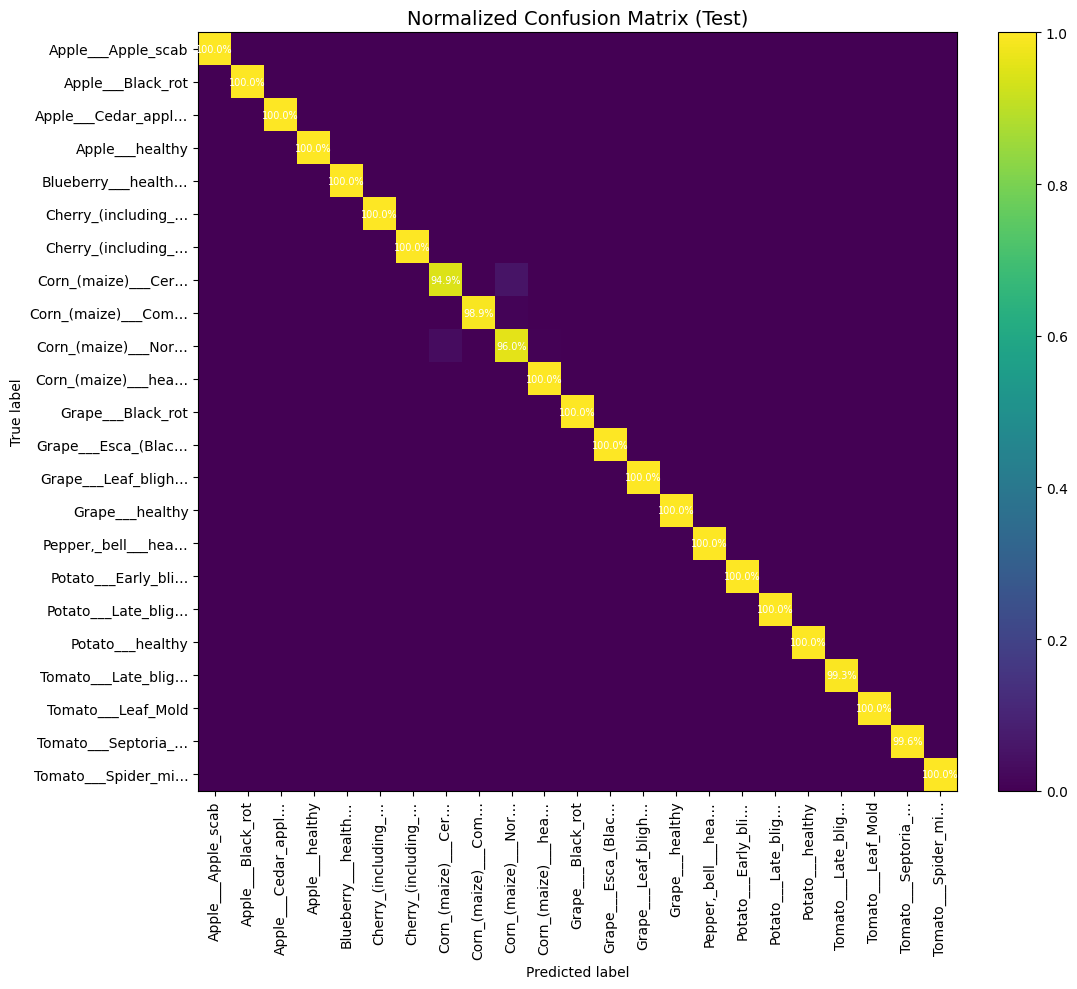

🖼️ Saved confusion matrix → /home/muhammad-noman/projects/plant_disease-gpu-env/outputs/confusion_matrix_test.png

🔎 Per-class accuracy (worst 5):
  Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot : 94.87%  | support=78
  Corn_(maize)___Northern_Leaf_Blight                : 95.97%  | support=149
  Corn_(maize)___Common_rust_                        : 98.89%  | support=180
  Tomato___Late_blight                               : 99.30%  | support=287
  Tomato___Septoria_leaf_spot                        : 99.63%  | support=267

🏅 Per-class accuracy (best 5):
  Tomato___Spider_mites Two-spotted_spider_mite      : 100.00%  | support=252
  Tomato___Leaf_Mold                                 : 100.00%  | support=144
  Potato___healthy                                   : 100.00%  | support=24
  Potato___Early_blight                              : 100.00%  | support=150
  Potato___Late_blight                               : 100.00%  | support=150

📄 Saved per-class accuracy → /home/muhammad-nom

In [3]:
# === STEP E: Strict test-set evaluation (report + confusion matrix) =========
import torch, os, json, itertools, numpy as np
from pathlib import Path
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

# ---- paths & objects from previous steps ----
PROJECT_ROOT = Path("/home/muhammad-noman/projects/plant_disease-gpu-env")
DATA_ROOT    = PROJECT_ROOT / "data"
TEST_DIR     = DATA_ROOT / "test"
MODEL_DIR    = PROJECT_ROOT / "models"
BEST_CKPT    = MODEL_DIR / "best_model.pth"

OUT_DIR = PROJECT_ROOT / "outputs"
OUT_DIR.mkdir(parents=True, exist_ok=True)

assert 'model' in globals(), "Model object missing. Recreate with STEP C if needed."
assert 'test_loader' in globals(), "test_loader missing. Rerun STEP C loaders."
assert 'class_names' in globals(), "class_names missing."

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

# --- load best weights ---
ckpt = torch.load(BEST_CKPT, map_location=device)
model.load_state_dict(ckpt['model_state_dict'])
model.eval()

# --- inference ---
all_preds, all_labels = [], []
with torch.no_grad():
    it = tqdm(test_loader, desc="Testing", leave=False)
    for imgs, labels in it:
        imgs = imgs.to(device, non_blocking=True)
        labels = labels.to(device, non_blocking=True)
        # AMP not required for eval but safe to use
        with torch.amp.autocast('cuda', enabled=(device=='cuda')):
            logits = model(imgs)
        preds = logits.argmax(1)
        all_preds.append(preds.cpu().numpy())
        all_labels.append(labels.cpu().numpy())

y_true = np.concatenate(all_labels)
y_pred = np.concatenate(all_preds)

# --- metrics ---
acc = accuracy_score(y_true, y_pred)
print(f"\n🎯 TEST ACCURACY: {acc*100:.2f}%  (strict, no leakage)\n")

report = classification_report(y_true, y_pred, target_names=class_names, digits=4, zero_division=0)
print(report)

# Save report
report_txt = OUT_DIR / "test_classification_report.txt"
with open(report_txt, "w", encoding="utf-8") as f:
    f.write(f"TEST ACCURACY: {acc*100:.2f}%\n\n")
    f.write(report)
print(f"📝 Saved report → {report_txt}")

# --- confusion matrix (normalized by true class) ---
cm = confusion_matrix(y_true, y_pred, labels=list(range(len(class_names))))
cm_norm = cm.astype(np.float64) / np.maximum(cm.sum(axis=1, keepdims=True), 1)

fig, ax = plt.subplots(figsize=(12, 10))
im = ax.imshow(cm_norm, interpolation='nearest', cmap='viridis')
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
ax.set_title('Normalized Confusion Matrix (Test)', fontsize=14)
tick_marks = np.arange(len(class_names))
ax.set_xticks(tick_marks)
ax.set_yticks(tick_marks)
ax.set_xticklabels([c[:18] + ('…' if len(c)>18 else '') for c in class_names], rotation=90)
ax.set_yticklabels([c[:18] + ('…' if len(c)>18 else '') for c in class_names])

# annotate a few cells (sparse to keep it readable)
for i in range(len(class_names)):
    for j in range(len(class_names)):
        if cm[i, j] > 0 and (i == j or cm_norm[i, j] >= 0.1):
            ax.text(j, i, f"{cm_norm[i, j]*100:.1f}%", ha="center", va="center", color="white", fontsize=7)

ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')
plt.tight_layout()
cm_path = OUT_DIR / "confusion_matrix_test.png"
plt.savefig(cm_path, dpi=150, bbox_inches='tight')
plt.show()
print(f"🖼️ Saved confusion matrix → {cm_path}")

# --- per-class accuracy summary ---
per_class_acc = (cm.diagonal() / np.maximum(cm.sum(axis=1), 1)) * 100.0
top_k = 5
worst_idx = np.argsort(per_class_acc)[:top_k]
best_idx  = np.argsort(per_class_acc)[-top_k:][::-1]

print("\n🔎 Per-class accuracy (worst 5):")
for idx in worst_idx:
    print(f"  {class_names[idx]:<50} : {per_class_acc[idx]:5.2f}%  | support={cm.sum(axis=1)[idx]}")

print("\n🏅 Per-class accuracy (best 5):")
for idx in best_idx:
    print(f"  {class_names[idx]:<50} : {per_class_acc[idx]:5.2f}%  | support={cm.sum(axis=1)[idx]}")

# Save CSV of per-class accuracy
import csv
acc_csv = OUT_DIR / "test_per_class_accuracy.csv"
with open(acc_csv, "w", newline="", encoding="utf-8") as f:
    w = csv.writer(f)
    w.writerow(["class_name", "accuracy_percent", "support"])
    for i, cname in enumerate(class_names):
        w.writerow([cname, f"{per_class_acc[i]:.2f}", int(cm.sum(axis=1)[i])])
print(f"\n📄 Saved per-class accuracy → {acc_csv}")
